## TASK 2


The recipe team asks you to help them with two requests based around the recipe usage data:

- Are there any recipes that are more popular during the week vs. the weekends, or
  the other way around?
- Do successful recipes have any features that distinguish them from less
  successful recipes?

In [1]:
import pandas as pd
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 2000)
pd.set_option('display.width', 1000)

In [2]:
task2= r'C:\Users\Monica Gowda\Desktop\FitApp Project\case_study_recipe_usage.parquet'

In [3]:
rcps= pd.read_parquet(task2) #reading data

In [4]:
rcps

date locale recipe_id                         name                                        description  portioncount  preparationtime difficulty  steps                                       instructions                                               tags  type  no_hits  no_sessions  no_users
0       2022-01-07     ko       100       Green Spinach Smoothie  When you first hear it, a green smoothie might...             1                5       easy      3  ["Wash the spinach and spin dry. Then, place i...  low_calorie,low_fat,breakfast,snack,vegan,glut...  view        2            1         1
1       2022-01-08     zh       100       Green Spinach Smoothie  When you first hear it, a green smoothie might...             1                5       easy      3  ["Wash the spinach and spin dry. Then, place i...  low_calorie,low_fat,breakfast,snack,vegan,glut...   use        1            1         1
2       2022-01-13     cs       100       Green Spinach Smoothie  When you first hear it, a green smoothie might...             1                5       easy      3  ["Wash the spinach and spin dry. Then, place i...  low_calorie,low_fat,breakfast,snack,vegan,glut...  view        5            5         5
3       2022-01-07     en       100       Green Spinach Smoothie  When you first hear it, a green smoothie might...             1                5       easy      3  ["Wash the spinach and spin dry. Then, place i...  low_calorie,low_fat,breakfast,snack,vegan,glut...  view      116          103       101
4       2022-01-02     ru       100       Green Spinach Smoothie  When you first hear it, a green smoothie might...             1                5       easy      3  ["Wash the spinach and spin dry. Then, place i...  low_calorie,low_fat,breakfast,snack,vegan,glut...   use        3            2         2
...            ...    ...       ...                          ...                                                ...           ...              ...        ...    ...                                                ...                                                ...   ...      ...          ...       ...
569570  2022-01-31     de      1640  Low Histamine Chicken Pizza  Our Low Histamine Chicken Pizza, topped with p...             2               41     normal      8  ["Preheat the oven to 430°F (220°C).","For the...  low_fat,dinner,lunch,meat,vegetables,sugar_fre...  view      188          167       166
569571  2022-01-31     de      1640  Low Histamine Chicken Pizza  Our Low Histamine Chicken Pizza, topped with p...             2               41     normal      8  ["Preheat the oven to 430°F (220°C).","For the...  low_fat,dinner,lunch,meat,vegetables,sugar_fre...   use        1            1         1
569572  2022-01-31     ko      1640  Low Histamine Chicken Pizza  Our Low Histamine Chicken Pizza, topped with p...             2               41     normal      8  ["Preheat the oven to 430°F (220°C).","For the...  low_fat,dinner,lunch,meat,vegetables,sugar_fre...  view        1            1         1
569573  2022-01-31     pl      1640  Low Histamine Chicken Pizza  Our Low Histamine Chicken Pizza, topped with p...             2               41     normal      8  ["Preheat the oven to 430°F (220°C).","For the...  low_fat,dinner,lunch,meat,vegetables,sugar_fre...  view       29           24        23
569574  2022-01-31     el      1640  Low Histamine Chicken Pizza  Our Low Histamine Chicken Pizza, topped with p...             2               41     normal      8  ["Preheat the oven to 430°F (220°C).","For the...  low_fat,dinner,lunch,meat,vegetables,sugar_fre...  view        4            3         3

[569575 rows x 15 columns]

In [5]:
rcps.shape # shape of dataset



(569575, 15)

In [6]:
rcps.describe() # check the data stats

portioncount  preparationtime          steps        no_hits    no_sessions       no_users
count  569575.000000    569575.000000  569575.000000  569575.000000  569575.000000  569575.000000
mean        3.962816        36.464460       6.266320      18.706151      15.904280      14.730483
std         4.485580        49.937804       2.447901      93.254702      77.295078      70.328491
min         1.000000         2.000000       1.000000       1.000000       1.000000       1.000000
25%         2.000000        15.000000       5.000000       1.000000       1.000000       1.000000
50%         2.000000        25.000000       6.000000       3.000000       3.000000       2.000000
75%         4.000000        40.000000       8.000000       8.000000       7.000000       7.000000
max        60.000000      1285.000000      16.000000    5673.000000    4441.000000    4063.000000

In [7]:
rcps.info() # check the columns and info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569575 entries, 0 to 569574
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   date             569575 non-null  object
 1   locale           569575 non-null  object
 2   recipe_id        569575 non-null  object
 3   name             569575 non-null  object
 4   description      569575 non-null  object
 5   portioncount     569575 non-null  int64 
 6   preparationtime  569575 non-null  int64 
 7   difficulty       569575 non-null  object
 8   steps            569575 non-null  int64 
 9   instructions     569575 non-null  object
 10  tags             569575 non-null  object
 11  type             569575 non-null  object
 12  no_hits          569575 non-null  int64 
 13  no_sessions      569575 non-null  int64 
 14  no_users         569575 non-null  int64 
dtypes: int64(6), object(9)
memory usage: 65.2+ MB


- There are no null values

In [8]:
#extracting days of week
rcps['date'] = pd.to_datetime(rcps['date'])
rcps['dow'] = rcps['date'].dt.day_name()

In [9]:
rcps

date locale recipe_id                         name                                        description  portioncount  preparationtime difficulty  steps                                       instructions                                               tags  type  no_hits  no_sessions  no_users       dow
0      2022-01-07     ko       100       Green Spinach Smoothie  When you first hear it, a green smoothie might...             1                5       easy      3  ["Wash the spinach and spin dry. Then, place i...  low_calorie,low_fat,breakfast,snack,vegan,glut...  view        2            1         1    Friday
1      2022-01-08     zh       100       Green Spinach Smoothie  When you first hear it, a green smoothie might...             1                5       easy      3  ["Wash the spinach and spin dry. Then, place i...  low_calorie,low_fat,breakfast,snack,vegan,glut...   use        1            1         1  Saturday
2      2022-01-13     cs       100       Green Spinach Smoothie  When you first hear it, a green smoothie might...             1                5       easy      3  ["Wash the spinach and spin dry. Then, place i...  low_calorie,low_fat,breakfast,snack,vegan,glut...  view        5            5         5  Thursday
3      2022-01-07     en       100       Green Spinach Smoothie  When you first hear it, a green smoothie might...             1                5       easy      3  ["Wash the spinach and spin dry. Then, place i...  low_calorie,low_fat,breakfast,snack,vegan,glut...  view      116          103       101    Friday
4      2022-01-02     ru       100       Green Spinach Smoothie  When you first hear it, a green smoothie might...             1                5       easy      3  ["Wash the spinach and spin dry. Then, place i...  low_calorie,low_fat,breakfast,snack,vegan,glut...   use        3            2         2    Sunday
...           ...    ...       ...                          ...                                                ...           ...              ...        ...    ...                                                ...                                                ...   ...      ...          ...       ...       ...
569570 2022-01-31     de      1640  Low Histamine Chicken Pizza  Our Low Histamine Chicken Pizza, topped with p...             2               41     normal      8  ["Preheat the oven to 430°F (220°C).","For the...  low_fat,dinner,lunch,meat,vegetables,sugar_fre...  view      188          167       166    Monday
569571 2022-01-31     de      1640  Low Histamine Chicken Pizza  Our Low Histamine Chicken Pizza, topped with p...             2               41     normal      8  ["Preheat the oven to 430°F (220°C).","For the...  low_fat,dinner,lunch,meat,vegetables,sugar_fre...   use        1            1         1    Monday
569572 2022-01-31     ko      1640  Low Histamine Chicken Pizza  Our Low Histamine Chicken Pizza, topped with p...             2               41     normal      8  ["Preheat the oven to 430°F (220°C).","For the...  low_fat,dinner,lunch,meat,vegetables,sugar_fre...  view        1            1         1    Monday
569573 2022-01-31     pl      1640  Low Histamine Chicken Pizza  Our Low Histamine Chicken Pizza, topped with p...             2               41     normal      8  ["Preheat the oven to 430°F (220°C).","For the...  low_fat,dinner,lunch,meat,vegetables,sugar_fre...  view       29           24        23    Monday
569574 2022-01-31     el      1640  Low Histamine Chicken Pizza  Our Low Histamine Chicken Pizza, topped with p...             2               41     normal      8  ["Preheat the oven to 430°F (220°C).","For the...  low_fat,dinner,lunch,meat,vegetables,sugar_fre...  view        4            3         3    Monday

[569575 rows x 16 columns]

In [10]:
rcps['recipe_id'].value_counts() 

134     1043
365     1029
76      1014
127     1008
114      981
366      963
412      960
493      955
352      942
93       942
59       930
428      919
221      915
293      906
107      897
80       896
392      893
235      889
356      887
243      885
84       884
204      876
300      874
38       871
319      869
404      867
367      860
31       859
298      857
603      850
385      847
309      845
115      844
121      843
100      842
112      840
306      837
529      833
360      828
217      826
463      826
13       819
49       818
631      818
24       816
397      812
701      811
253      809
75       809
353      808
135      808
62       799
387      797
71       786
182      785
21       784
85       784
170      782
150      782
371      777
492      776
202      770
37       769
281      767
218      767
5        766
419      764
445      759
53       758
7        749
502      749
451      747
255      744
426      738
27       738
154      737
252      733

In [11]:
weekend=['Saturday','Sunday'] #weekend

In [12]:
rcps['weekend_day']=rcps['dow'].apply(lambda x: 'weekend' if x in weekend else 'weekday') #creating new column for weekday and weekend

In [13]:
rcps #displaying the dataframe

date locale recipe_id                         name                                        description  portioncount  preparationtime difficulty  steps                                       instructions                                               tags  type  no_hits  no_sessions  no_users       dow weekend_day
0      2022-01-07     ko       100       Green Spinach Smoothie  When you first hear it, a green smoothie might...             1                5       easy      3  ["Wash the spinach and spin dry. Then, place i...  low_calorie,low_fat,breakfast,snack,vegan,glut...  view        2            1         1    Friday     weekday
1      2022-01-08     zh       100       Green Spinach Smoothie  When you first hear it, a green smoothie might...             1                5       easy      3  ["Wash the spinach and spin dry. Then, place i...  low_calorie,low_fat,breakfast,snack,vegan,glut...   use        1            1         1  Saturday     weekend
2      2022-01-13     cs       100       Green Spinach Smoothie  When you first hear it, a green smoothie might...             1                5       easy      3  ["Wash the spinach and spin dry. Then, place i...  low_calorie,low_fat,breakfast,snack,vegan,glut...  view        5            5         5  Thursday     weekday
3      2022-01-07     en       100       Green Spinach Smoothie  When you first hear it, a green smoothie might...             1                5       easy      3  ["Wash the spinach and spin dry. Then, place i...  low_calorie,low_fat,breakfast,snack,vegan,glut...  view      116          103       101    Friday     weekday
4      2022-01-02     ru       100       Green Spinach Smoothie  When you first hear it, a green smoothie might...             1                5       easy      3  ["Wash the spinach and spin dry. Then, place i...  low_calorie,low_fat,breakfast,snack,vegan,glut...   use        3            2         2    Sunday     weekend
...           ...    ...       ...                          ...                                                ...           ...              ...        ...    ...                                                ...                                                ...   ...      ...          ...       ...       ...         ...
569570 2022-01-31     de      1640  Low Histamine Chicken Pizza  Our Low Histamine Chicken Pizza, topped with p...             2               41     normal      8  ["Preheat the oven to 430°F (220°C).","For the...  low_fat,dinner,lunch,meat,vegetables,sugar_fre...  view      188          167       166    Monday     weekday
569571 2022-01-31     de      1640  Low Histamine Chicken Pizza  Our Low Histamine Chicken Pizza, topped with p...             2               41     normal      8  ["Preheat the oven to 430°F (220°C).","For the...  low_fat,dinner,lunch,meat,vegetables,sugar_fre...   use        1            1         1    Monday     weekday
569572 2022-01-31     ko      1640  Low Histamine Chicken Pizza  Our Low Histamine Chicken Pizza, topped with p...             2               41     normal      8  ["Preheat the oven to 430°F (220°C).","For the...  low_fat,dinner,lunch,meat,vegetables,sugar_fre...  view        1            1         1    Monday     weekday
569573 2022-01-31     pl      1640  Low Histamine Chicken Pizza  Our Low Histamine Chicken Pizza, topped with p...             2               41     normal      8  ["Preheat the oven to 430°F (220°C).","For the...  low_fat,dinner,lunch,meat,vegetables,sugar_fre...  view       29           24        23    Monday     weekday
569574 2022-01-31     el      1640  Low Histamine Chicken Pizza  Our Low Histamine Chicken Pizza, topped with p...             2               41     normal      8  ["Preheat the oven to 430°F (220°C).","For the...  low_fat,dinner,lunch,meat,vegetables,sugar_fre...  view        4            3         3    Monday     weekday

[569575 rows x 17 columns]

###### There are 1640 Unique Recipies

In [14]:
import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline 

import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [15]:
weekend=rcps[(rcps['weekend_day']=='weekend')] #weekend data frame

In [16]:
weekend['recipe_id'].value_counts() #checking the recipes

134     331
365     323
76      321
114     318
127     315
366     308
93      303
412     295
352     295
59      293
493     291
428     290
235     287
293     284
107     284
221     283
356     283
80      282
38      280
392     280
31      279
204     278
84      277
112     275
300     275
319     275
243     274
463     268
603     268
360     266
309     266
121     265
404     264
100     263
298     262
135     261
13      261
367     261
306     261
631     261
529     260
115     260
385     259
397     258
253     255
49      255
353     255
701     255
387     254
75      252
217     252
62      252
419     251
150     251
170     249
24      248
21      247
371     246
5       246
281     245
85      245
218     245
492     244
227     242
53      241
255     241
7       240
71      240
123     238
37      238
202     238
445     237
182     236
502     234
252     233
460     232
451     231
4       230
154     230
426     229
136     229
299     228
27      227
82  

In [17]:
weekend['dow'].value_counts() #just checking the days of week 

Sunday      94798
Saturday    85741
Name: dow, dtype: int64

In [18]:
weekday=rcps[~(rcps['weekend_day']=='weekend')] #weekday DF

In [19]:
weekday.shape

(389036, 17)

In [20]:
weekday['recipe_id'].value_counts()

134     712
365     706
127     693
76      693
412     665
493     664
114     663
366     655
352     647
93      639
59      637
221     632
428     629
293     622
80      614
107     613
392     613
243     611
84      607
356     604
404     603
235     602
367     599
300     599
204     598
298     595
319     594
38      591
385     588
115     584
603     582
31      580
309     579
100     579
121     578
306     576
217     574
529     573
24      568
112     565
49      563
360     562
13      558
463     558
631     557
75      557
701     556
397     554
253     554
353     553
182     549
62      547
135     547
71      546
387     543
85      539
21      537
170     533
202     532
492     532
37      531
371     531
150     531
445     522
281     522
218     522
5       520
53      517
451     516
502     515
419     513
27      511
7       509
426     509
18      507
154     507
307     505
255     503
94      502
252     500
299     499
234     498
147     495
177 

In [21]:
weekday['dow'].value_counts() #check point

Monday       95913
Tuesday      76312
Wednesday    74812
Thursday     73013
Friday       68986
Name: dow, dtype: int64

In [22]:
setWE= set(weekend['recipe_id'].to_list()) #getting unique recipe id for weekend 
setWE


{'840',
 '1356',
 '1516',
 '601',
 '1567',
 '1006',
 '223',
 '1566',
 '622',
 '329',
 '1283',
 '288',
 '1538',
 '1585',
 '7',
 '1438',
 '705',
 '480',
 '982',
 '342',
 '473',
 '820',
 '488',
 '1468',
 '1304',
 '548',
 '182',
 '330',
 '1008',
 '1489',
 '922',
 '476',
 '1564',
 '193',
 '1385',
 '626',
 '416',
 '1058',
 '10',
 '1452',
 '203',
 '760',
 '950',
 '1070',
 '1099',
 '1457',
 '1049',
 '585',
 '31',
 '261',
 '1591',
 '748',
 '254',
 '703',
 '839',
 '1322',
 '50',
 '147',
 '1080',
 '5',
 '425',
 '541',
 '1112',
 '1148',
 '1226',
 '665',
 '148',
 '1178',
 '1085',
 '391',
 '697',
 '1430',
 '361',
 '996',
 '271',
 '1093',
 '1135',
 '498',
 '975',
 '245',
 '1436',
 '878',
 '1400',
 '1444',
 '904',
 '507',
 '1285',
 '1390',
 '1410',
 '662',
 '978',
 '52',
 '1376',
 '26',
 '1185',
 '893',
 '816',
 '1036',
 '598',
 '309',
 '1387',
 '57',
 '468',
 '812',
 '469',
 '118',
 '841',
 '496',
 '683',
 '224',
 '504',
 '1415',
 '1312',
 '693',
 '1483',
 '890',
 '547',
 '948',
 '1533',
 '1412',
 '1

In [23]:
len(setWE) 

1600

#### There are 1600 reciepes used during the weekend

In [24]:
setWD= set(weekday['recipe_id'].to_list()) #unique weekday reciepe 
setWD

{'840',
 '1356',
 '1516',
 '601',
 '1567',
 '1006',
 '223',
 '1566',
 '622',
 '329',
 '1283',
 '288',
 '1538',
 '1585',
 '7',
 '1438',
 '705',
 '480',
 '982',
 '342',
 '473',
 '820',
 '488',
 '1468',
 '1304',
 '548',
 '182',
 '330',
 '1008',
 '1489',
 '922',
 '476',
 '1564',
 '193',
 '1385',
 '626',
 '416',
 '1058',
 '10',
 '1452',
 '203',
 '760',
 '950',
 '1070',
 '1099',
 '1457',
 '1049',
 '585',
 '31',
 '261',
 '1591',
 '748',
 '254',
 '703',
 '839',
 '1322',
 '50',
 '1636',
 '147',
 '1080',
 '5',
 '425',
 '541',
 '1112',
 '1148',
 '1226',
 '665',
 '148',
 '1178',
 '1085',
 '391',
 '697',
 '1430',
 '361',
 '996',
 '271',
 '1093',
 '1135',
 '498',
 '975',
 '245',
 '1436',
 '878',
 '1400',
 '1444',
 '904',
 '507',
 '1285',
 '1390',
 '1410',
 '662',
 '978',
 '52',
 '1376',
 '26',
 '1622',
 '1185',
 '893',
 '816',
 '1036',
 '598',
 '309',
 '1387',
 '57',
 '468',
 '812',
 '469',
 '118',
 '841',
 '496',
 '683',
 '224',
 '504',
 '1415',
 '1312',
 '693',
 '1483',
 '890',
 '547',
 '948',
 '1

In [25]:
len(setWD) 

1640

##### There are 1640 recipes used duirng weekday. (there are 1640 recipes all together)

In [26]:
r= list(setWD-setWE) #identifing the recipes unique for weekday
r

['1616',
 '1630',
 '1613',
 '1639',
 '1638',
 '1612',
 '1608',
 '1624',
 '1614',
 '1609',
 '1622',
 '1615',
 '1635',
 '1625',
 '1617',
 '1606',
 '1640',
 '1631',
 '1618',
 '1629',
 '1610',
 '1621',
 '1603',
 '1601',
 '1634',
 '1619',
 '1633',
 '1607',
 '1626',
 '1611',
 '1637',
 '1605',
 '1620',
 '1627',
 '1628',
 '1623',
 '1636',
 '1602',
 '1632',
 '1604']

r=list(r)
r


In [27]:
len(r)

40

###### There are about 40 recipes not used during weekend 

In [28]:
rcps.columns # the columns

Index(['date', 'locale', 'recipe_id', 'name', 'description', 'portioncount', 'preparationtime', 'difficulty', 'steps', 'instructions', 'tags', 'type', 'no_hits', 'no_sessions', 'no_users', 'dow', 'weekend_day'], dtype='object')

_____________________

### Creating A list of recipes

In [29]:
rcps_list=rcps[['recipe_id','name','description', 'portioncount', 'preparationtime', 'difficulty', 'steps', 'instructions', 'tags']]

In [30]:

rcps_list.drop_duplicates(inplace=True)
rcps_list

recipe_id                                               name                                        description  portioncount  preparationtime difficulty  steps                                       instructions                                               tags
0            100                             Green Spinach Smoothie  When you first hear it, a green smoothie might...             1                5       easy      3  ["Wash the spinach and spin dry. Then, place i...  low_calorie,low_fat,breakfast,snack,vegan,glut...
842          101                   Catfish Goulash in Paprika Sauce  The meat of the catfish is firm and full of fl...             2               35     normal      8  ["Peel the onions and garlic clove and finely ...  high_protein,low_carb,lunch,dinner,gluten_free...
1131         102                           Chicken Paella with Peas  Paella is a traditional Spanish meal usually p...             2               60     normal     10  ["Mix 1 tsp. of olive oil and the paprika powd...  low_fat,lunch,dinner,lactose_free,gluten_free,...
1622         103             Lime Quinoa with BBQ Chicken & Avocado  This recipe isn't just an eye-catcher, it's a ...             4               30       hard      9  ["Cut the chicken into bite-sized pieces and s...             lunch,dinner,lactose_free,meat,400kcal
2223         104                           Avocado Chocolate Mousse  A healthy alternative for chocolate lovers. Ou...             2                5       easy      3  ["Cut, pit and peel the avocado.","Mix with th...  low_carb,snack,vegan,vegetarian,gluten_free,la...
2764         105               Marinated Beefsteak with Green Beans  The beefsteak and green beans are sautéed in t...             2               30     normal      9  ["Peel and finely chop the garlic clove and cu...  low_carb,high_protein,lunch,dinner,gluten_free...
3144         106           Cream Cheese & Spinach Rolls with Salmon  Our cream cheese and spinach rolls with salmon...             1               20     normal      6  ["Put 1 egg in the blender, separate the secon...  low_carb,dinner,lunch,gluten_free,sugar_free,f...
3526         107                              Chicken & Potato Dish  There are a lot of frozen vegetable dishes, bu...             2               20     normal      6  ["Put the beans in a small pot of boiling wate...  low_calorie,low_fat,lunch,dinner,gluten_free,l...
4423         108                         Potato Curry with Eggplant  Our potato curry with eggplant and light cocon...             1               40     normal      5  ["Cut the potatoes, eggplant, mushrooms and on...  low_calorie,lunch,dinner,gluten_free,lactose_f...
4925         109                         Potato & Spinach Casserole  This casserole most certainly lives up to the ...             2               45     normal      7  ["Cut the potatoes into thin slices and lay in...  low_calorie,low_fat,lunch,dinner,casserole,veg...
5620          10                   Sugar-free Bottomless Cheesecake  This cheesecake  can be prepared quickly and o...             8              180       hard      9  ["Coat a springform pan (Ø 18 cm \/ 7.1 inch) ...  low_carb,vegetarian,gluten_free,sugar_free,des...
6135         110                                      One-Pot Pasta  Not in the mood to dirty a bunch of dishes? Th...             1               15       easy      5  ["Break the wholegrain spaghetti in half and p...  low_fat,lunch,dinner,vegetarian,lactose_free,h...
6751         111                      Tomato Millet with Vegetables  Millet can be enjoyed both sweet and savory. O...             2               20     normal      5  ["Prepare the millet according to the package'...  low_calorie,low_fat,lunch,dinner,vegetarian,ve...
7165         112                              2-Ingredient Pancakes  The fastest breakfast in the world—pancakes fr...             2               15       easy      3  ["Separate the eggs and blend the yolks with t...  breakfa

In [31]:
rcps_list.shape

(1640, 9)

______________________________

In [32]:
#getting the details of recipe that is not used during weekend

rcps_list[rcps_list['recipe_id'].isin(
['1623',
 '1630',
 '1632',
 '1635',
 '1633',
 '1628',
 '1634',
 '1607',
 '1631',
 '1640',
 '1626',
 '1608',
 '1614',
 '1637',
 '1604',
 '1611',
 '1609',
 '1605',
 '1624',
 '1606',
 '1615',
 '1622',
 '1616',
 '1627',
 '1610',
 '1636',
 '1613',
 '1629',
 '1612',
 '1617',
 '1620',
 '1639',
 '1621',
 '1603',
 '1625',
 '1638',
 '1619',
 '1601',
 '1618',
 '1602'])]

recipe_id                                            name                                        description  portioncount  preparationtime difficulty  steps                                       instructions                                               tags
569437      1601                            Sweet Potato Muffins  These moist Sweet Potato Muffins are healthy a...            12               50       easy      7  ["Peel the sweet potato, cut into small cubes ...  snack,sweet,dessert,vegetables,vegetarian,glut...
569439      1602                 Polenta Chia Breakfast Porridge  Our Polenta Chia Breakfast Porridge is rounded...             2               20       easy      5  ["Bring the polenta and rice milk to a boil in...  breakfast,sweet,vegan,vegetarian,gluten_free,l...
569442      1603       Sage Linguine with Zucchini & Ground Beef  Our Sage Linguine with Zucchini & Ground Beef ...             1               26       easy      7  ["Peel and finely chop the onion and garlic.",...  dinner,lunch,meat,vegetables,lactose_free,suga...
569444      1604                               Macadamia Lasagne  Our Macadamia Lasagne will bring your taste bu...             4               70     normal      9  ["Preheat the oven to 395°F (200°C).","Peel an...  dinner,lunch,vegetables,lactose_free,casserole...
569445      1605          Vanilla Rice Pudding with Blackberries  Our Vanilla Rice Pudding with Blackberries is ...             2               29       easy      2  ["Combine the rice and almond milk in a small ...  low_fat,snack,sweet,dessert,fruits,on_the_go,v...
569446      1606                 Cornmeal Crusted Fried Potatoes  Cornmeal Crusted Fried Potatoes are wonderfull...             2               55     normal      6  ["Peel the potatoes and, if necessary, cut in ...  dinner,lunch,vegetables,vegetarian,sugar_free,...
569449      1607                Low Histamine Potato Bread Rolls  If you have some leftover potatoes from last n...             5               70     normal      7  ["Peel and cut the potatoes into cubes. Cook t...  low_fat,breakfast,on_the_go,vegetarian,sugar_f...
569451      1608               White Chocolate Macadamia Cookies  Our White Chocolate Macadamia Cookies are done...             8               20       easy      7  ["Preheat the oven to  360°F (180°C).","Combin...  low_carb,snack,sweet,dessert,baking,vegetarian...
569453      1609            Rice Balls with Pan Fried Vegetables  Our Rice Balls with Pan Fried Vegetables are f...             1               43     normal     10  ["Prepare the rice according to the package in...  dinner,lunch,vegetables,lactose_free,vegan,veg...
569456      1610                 Gnocchi with Sweet Potato Sauce  Our Gnocchi with Sweet Potato Sauce are great ...             2               30       easy      6  ["Peel the sweet potato, cut into cubes and co...  low_fat,dinner,lunch,vegetables,vegan,vegetari...
569460      1611                             Low Histamine Bread  Even without yeast, our Low Histamine Bread ri...            10              180     normal      6  ["Combine the psyllium husks and water in a la...  low_fat,breakfast,vegan,vegetarian,lactose_fre...
569466      1612                                   Granola Bites  Our Granola Bites are a fiber-rich snack to en...             5               55       easy      4  ["Preheat the oven to  360°F (180°C).","Finely...  low_fat,snack,on_the_go,vegan,vegetarian,lacto...
569471      1613           Chicken Salad with Blueberry Dressing  Our Chicken Salad with Blueberry Dressing is a...             2               35       easy      7  ["Preheat the oven to  360°F (180°C).","Season...  low_carb,high_protein,dinner,lunch,salad,veget...
569477      1614                    Quinoa Porridge with Berries  Thanks to the quinoa, our Quinoa Porridge with...             2               22       easy      4  ["Bring the quinoa and water to a boil in a po...  breakfast,dessert,fruits,gluten_free,lactose_f...
56

###### These recipes could be new and released over the week and not weekend. Hence not used during weekend.
###### The recipe_id looks like the latest entries

We will remove the latest entries for popularity and successful check as they could hinder the analysis

In [33]:
rcps=rcps[~(rcps['recipe_id'].isin(['1623',
 '1630',
 '1632',
 '1635',
 '1633',
 '1628',
 '1634',
 '1607',
 '1631',
 '1640',
 '1626',
 '1608',
 '1614',
 '1637',
 '1604',
 '1611',
 '1609',
 '1605',
 '1624',
 '1606',
 '1615',
 '1622',
 '1616',
 '1627',
 '1610',
 '1636',
 '1613',
 '1629',
 '1612',
 '1617',
 '1620',
 '1639',
 '1621',
 '1603',
 '1625',
 '1638',
 '1619',
 '1601',
 '1618',
 '1602']))]

In [34]:
rcps

date locale recipe_id                    name                                        description  portioncount  preparationtime difficulty  steps                                       instructions                                               tags  type  no_hits  no_sessions  no_users       dow weekend_day
0      2022-01-07     ko       100  Green Spinach Smoothie  When you first hear it, a green smoothie might...             1                5       easy      3  ["Wash the spinach and spin dry. Then, place i...  low_calorie,low_fat,breakfast,snack,vegan,glut...  view        2            1         1    Friday     weekday
1      2022-01-08     zh       100  Green Spinach Smoothie  When you first hear it, a green smoothie might...             1                5       easy      3  ["Wash the spinach and spin dry. Then, place i...  low_calorie,low_fat,breakfast,snack,vegan,glut...   use        1            1         1  Saturday     weekend
2      2022-01-13     cs       100  Green Spinach Smoothie  When you first hear it, a green smoothie might...             1                5       easy      3  ["Wash the spinach and spin dry. Then, place i...  low_calorie,low_fat,breakfast,snack,vegan,glut...  view        5            5         5  Thursday     weekday
3      2022-01-07     en       100  Green Spinach Smoothie  When you first hear it, a green smoothie might...             1                5       easy      3  ["Wash the spinach and spin dry. Then, place i...  low_calorie,low_fat,breakfast,snack,vegan,glut...  view      116          103       101    Friday     weekday
4      2022-01-02     ru       100  Green Spinach Smoothie  When you first hear it, a green smoothie might...             1                5       easy      3  ["Wash the spinach and spin dry. Then, place i...  low_calorie,low_fat,breakfast,snack,vegan,glut...   use        3            2         2    Sunday     weekend
...           ...    ...       ...                     ...                                                ...           ...              ...        ...    ...                                                ...                                                ...   ...      ...          ...       ...       ...         ...
569432 2022-01-30     ru      1600        Paleo Lemon Cake  Our Paleo Lemon Cake has a gluten-free crust s...             9              170     normal      8  ["Preheat the oven to 350°F (175°C).","For the...  snack,sweet,dessert,vegetarian,on_the_go,glute...   use        2            2         2    Sunday     weekend
569433 2022-01-30     fi      1600        Paleo Lemon Cake  Our Paleo Lemon Cake has a gluten-free crust s...             9              170     normal      8  ["Preheat the oven to 350°F (175°C).","For the...  snack,sweet,dessert,vegetarian,on_the_go,glute...  view       16           13        13    Sunday     weekend
569434 2022-01-31     ko      1600        Paleo Lemon Cake  Our Paleo Lemon Cake has a gluten-free crust s...             9              170     normal      8  ["Preheat the oven to 350°F (175°C).","For the...  snack,sweet,dessert,vegetarian,on_the_go,glute...  view        8            6         6    Monday     weekday
569435 2022-01-30     es      1600        Paleo Lemon Cake  Our Paleo Lemon Cake has a gluten-free crust s...             9              170     normal      8  ["Preheat the oven to 350°F (175°C).","For the...  snack,sweet,dessert,vegetarian,on_the_go,glute...  view       78           64        64    Sunday     weekend
569436 2022-01-31     el      1600        Paleo Lemon Cake  Our Paleo Lemon Cake has a gluten-free crust s...             9              170     normal      8  ["Preheat the oven to 350°F (175°C).","For the...  snack,sweet,dessert,vegetarian,on_the_go,glute...  view       49           42        41    Monday     weekday

[569437 rows x 17 columns]

----------------------------------------------

#### _`Assumptions`_:

- I will be using no_users for the popularity check as the data is given by date level counting the number of users would be better to check popularity as no_hits could also mean that the same user checked th recipe on same day multiplle times.

## Finding the dishes popular over weekday and weekend 

#### _`Assumptions`_:
Will be grouping by mean of no_users for the weekday vs weekend analysis
Taking the average would give us a better figure as average would not be affected by number of days 
Weekend has only 2 days and weekday 5. taking sum would not give us desired results 

In [35]:
r=rcps[['recipe_id','name','locale','no_hits','no_sessions','no_users','weekend_day']] #using only required column
WD=r.groupby(['weekend_day','recipe_id','name']).mean().sort_values(by='no_users', ascending=False)  #creating df by grouping weekday and recipe 

In [36]:
WD

no_hits  no_sessions    no_users
weekend_day recipe_id name                                                                 
weekday     1600      Paleo Lemon Cake                  209.956522   180.869565  178.826087
            366       Mozzarella Pan Pizza              138.126718   115.039695  104.870229
weekend     366       Mozzarella Pan Pizza              116.668831    97.600649   90.782468
weekday     121       Greek Yogurt & Blueberry Soufflé  123.984429   101.487889   90.377163
weekend     121       Greek Yogurt & Blueberry Soufflé  121.169811    99.871698   89.762264
...                                                            ...          ...         ...
            1141      Watermelon Radish Salad             1.636364     1.590909    1.545455
            1045      Pkhali (Spinach Balls)              1.533333     1.533333    1.533333
weekday     1308      Cranberry Sauce                     1.571429     1.428571    1.428571
weekend     1396      Grilled Mango with Frozen Yogurt    1.633333     1.466667    1.400000
weekday     1045      Pkhali (Spinach Balls)              1.458333     1.416667    1.375000

[3200 rows x 3 columns]

In [37]:
WD.reset_index(inplace=True) #removing index for better analysis

In [38]:
WD.head()

weekend_day recipe_id                              name     no_hits  no_sessions    no_users
0     weekday      1600                  Paleo Lemon Cake  209.956522   180.869565  178.826087
1     weekday       366              Mozzarella Pan Pizza  138.126718   115.039695  104.870229
2     weekend       366              Mozzarella Pan Pizza  116.668831    97.600649   90.782468
3     weekday       121  Greek Yogurt & Blueberry Soufflé  123.984429   101.487889   90.377163
4     weekend       121  Greek Yogurt & Blueberry Soufflé  121.169811    99.871698   89.762264

Text(0.5, 1.0, 'Popular recipes on Weekend')

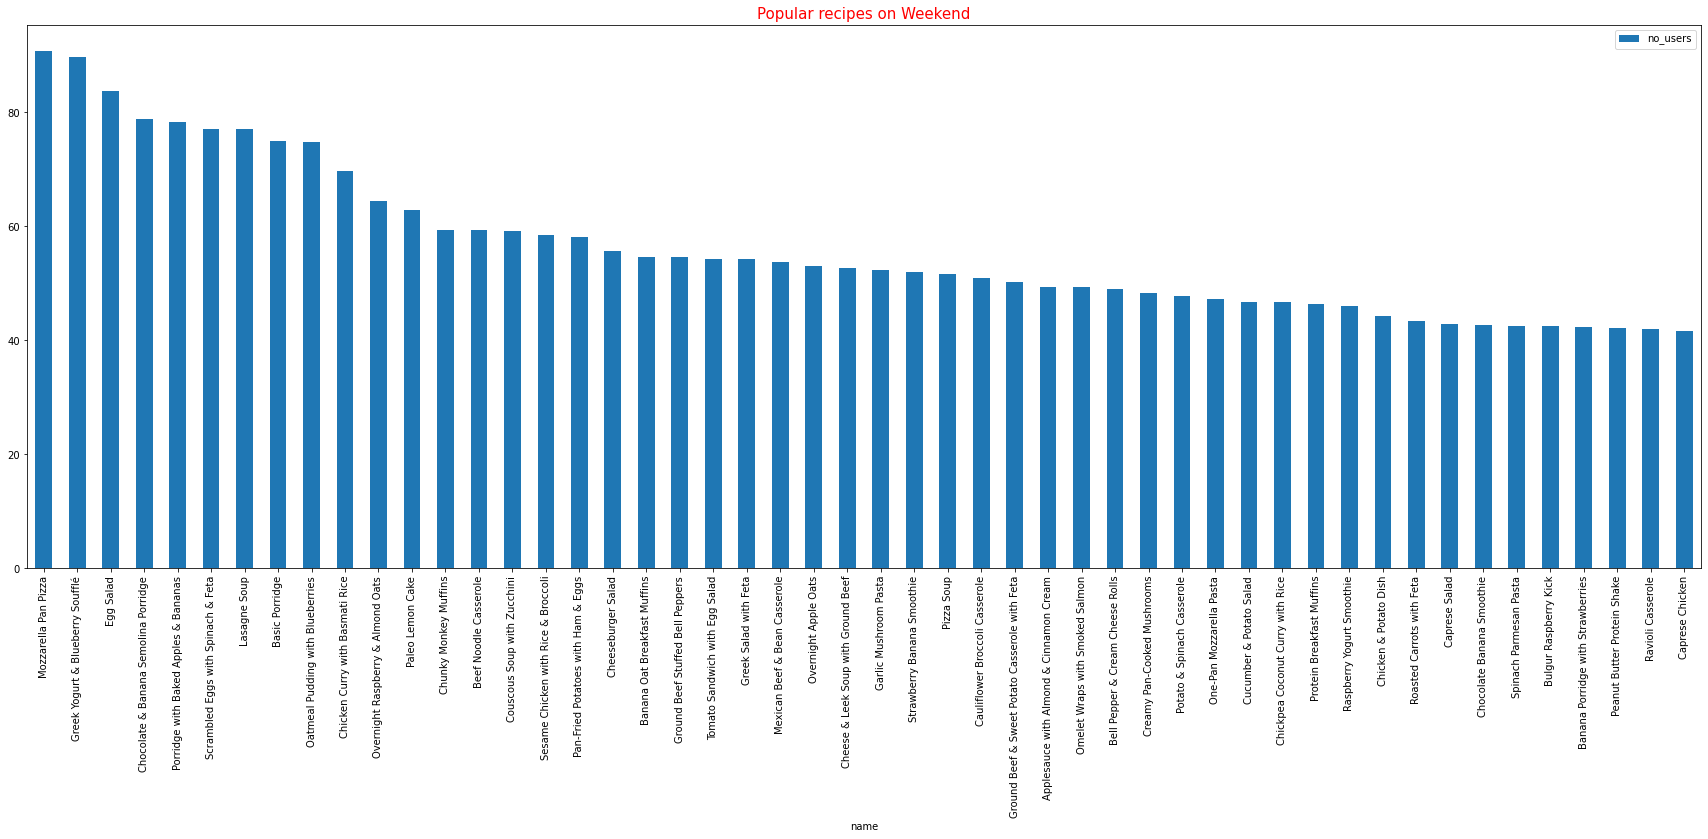

In [39]:
#plt.figure(figsize=(30,30))
WEnd=WD[(WD['weekend_day']=='weekend')] # taking only weekend data 
WEnd[:50].plot(kind='bar',x='name',y='no_users',figsize=(30,10)) #taking only top 50 recipes for weekend 
plt.title('Popular recipes on Weekend',fontdict={'fontsize':15, 'fontweight':10, 'color':'Red'})


In [40]:
WEnd=WEnd[:50]


Text(0.5, 1.0, 'Popular recipes on WeekDay')

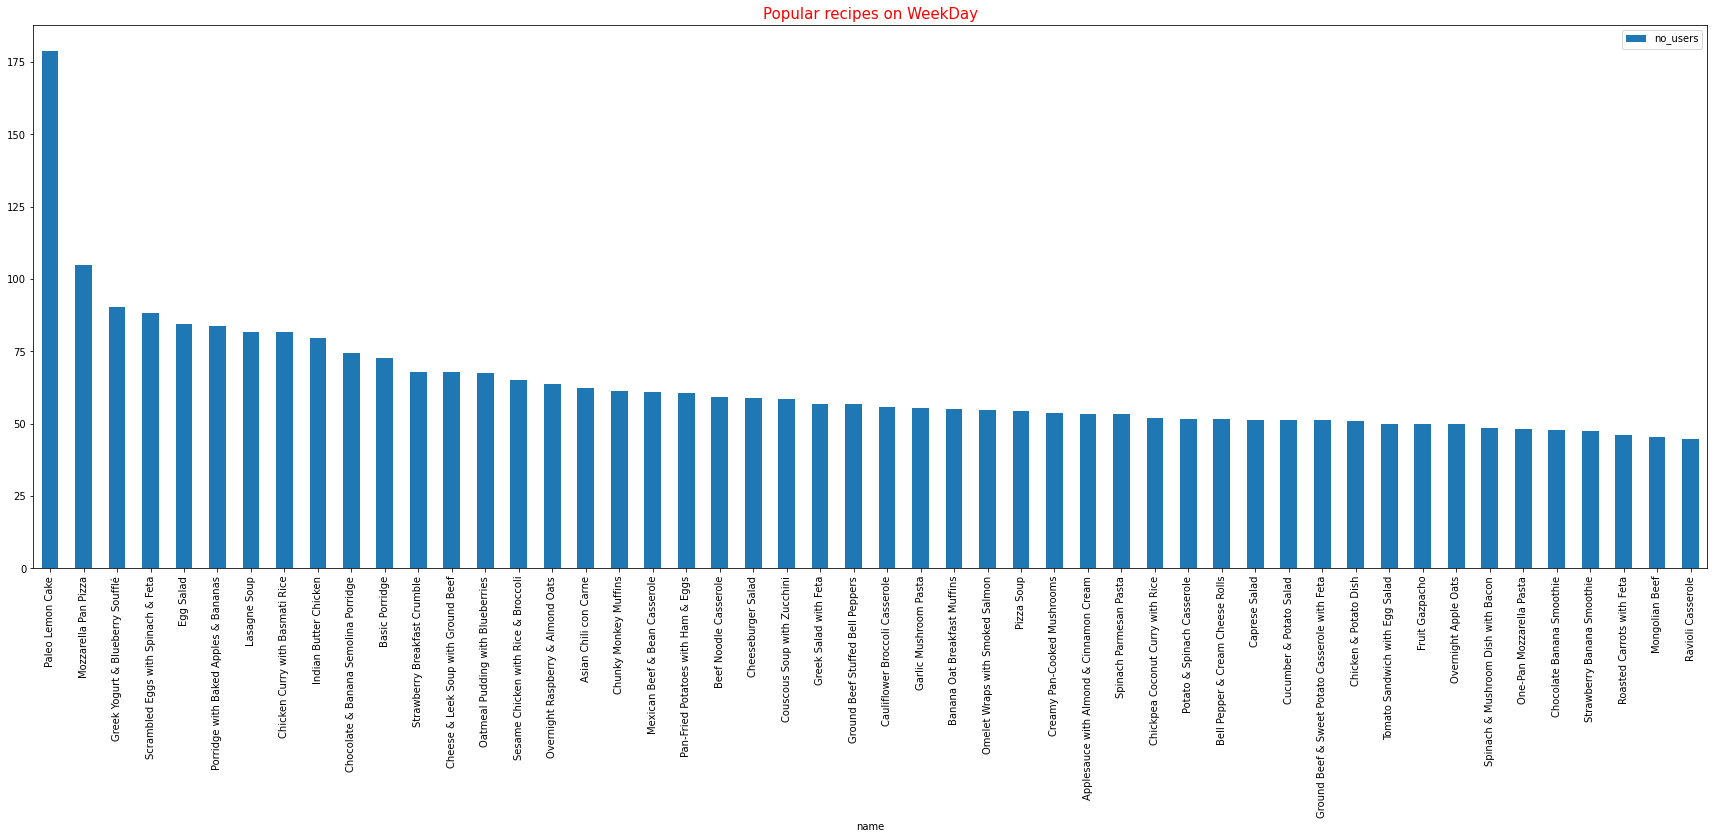

In [41]:
#plt.figure(figsize=(30,30))
WDay=WD[(WD['weekend_day']=='weekday')]
WDay[:50].plot(kind='bar',x='name',y='no_users',figsize=(30,10)) #taking top 50 reciepes for weekday
plt.title('Popular recipes on WeekDay',fontdict={'fontsize':15, 'fontweight':10, 'color':'Red'})

In [42]:
WDay=WDay[:50]

In [43]:
WEnd['name']

2                                Mozzarella Pan Pizza
4                    Greek Yogurt & Blueberry Soufflé
8                                           Egg Salad
12               Chocolate & Banana Semolina Porridge
13               Porridge with Baked Apples & Bananas
14                 Scrambled Eggs with Spinach & Feta
15                                       Lasagne Soup
16                                     Basic Porridge
17                   Oatmeal Pudding with Blueberries
20                    Chicken Curry with Basmati Rice
25                  Overnight Raspberry & Almond Oats
27                                   Paleo Lemon Cake
33                              Chunky Monkey Muffins
34                              Beef Noodle Casserole
35                        Couscous Soup with Zucchini
38                Sesame Chicken with Rice & Broccoli
39                 Pan-Fried Potatoes with Ham & Eggs
43                                 Cheeseburger Salad
47                       Ban

In [44]:
WDay['name']

0                                   Paleo Lemon Cake
1                               Mozzarella Pan Pizza
3                   Greek Yogurt & Blueberry Soufflé
5                 Scrambled Eggs with Spinach & Feta
6                                          Egg Salad
7               Porridge with Baked Apples & Bananas
9                                       Lasagne Soup
10                   Chicken Curry with Basmati Rice
11                             Indian Butter Chicken
18              Chocolate & Banana Semolina Porridge
19                                    Basic Porridge
21                      Strawberry Breakfast Crumble
22               Cheese & Leek Soup with Ground Beef
23                  Oatmeal Pudding with Blueberries
24               Sesame Chicken with Rice & Broccoli
26                 Overnight Raspberry & Almond Oats
28                             Asian Chili con Carne
29                             Chunky Monkey Muffins
30                     Mexican Beef & Bean Cas

In [45]:
WE=WEnd['name'].values.tolist() #list of recipes popular on weekend
WE



['Mozzarella Pan Pizza',
 'Greek Yogurt & Blueberry Soufflé',
 'Egg Salad',
 'Chocolate & Banana Semolina Porridge',
 'Porridge with Baked Apples & Bananas',
 'Scrambled Eggs with Spinach & Feta',
 'Lasagne Soup',
 'Basic Porridge',
 'Oatmeal Pudding with Blueberries',
 'Chicken Curry with Basmati Rice',
 'Overnight Raspberry & Almond Oats',
 'Paleo Lemon Cake',
 'Chunky Monkey Muffins',
 'Beef Noodle Casserole',
 'Couscous Soup with Zucchini',
 'Sesame Chicken with Rice & Broccoli',
 'Pan-Fried Potatoes with Ham & Eggs',
 'Cheeseburger Salad',
 'Banana Oat Breakfast Muffins',
 'Ground Beef Stuffed Bell Peppers',
 'Tomato Sandwich with Egg Salad',
 'Greek Salad with Feta',
 'Mexican Beef & Bean Casserole',
 'Overnight Apple Oats',
 'Cheese & Leek Soup with Ground Beef',
 'Garlic Mushroom Pasta',
 'Strawberry Banana Smoothie',
 'Pizza Soup',
 'Cauliflower Broccoli Casserole',
 'Ground Beef & Sweet Potato Casserole with Feta',
 'Applesauce with Almond & Cinnamon Cream',
 'Omelet Wraps wi

In [46]:
WD=WDay['name'].values.tolist()#list of recipes popular on weekday
WD

['Paleo Lemon Cake',
 'Mozzarella Pan Pizza',
 'Greek Yogurt & Blueberry Soufflé',
 'Scrambled Eggs with Spinach & Feta',
 'Egg Salad',
 'Porridge with Baked Apples & Bananas',
 'Lasagne Soup',
 'Chicken Curry with Basmati Rice',
 'Indian Butter Chicken',
 'Chocolate & Banana Semolina Porridge',
 'Basic Porridge',
 'Strawberry Breakfast Crumble',
 'Cheese & Leek Soup with Ground Beef',
 'Oatmeal Pudding with Blueberries',
 'Sesame Chicken with Rice & Broccoli',
 'Overnight Raspberry & Almond Oats',
 'Asian Chili con Carne',
 'Chunky Monkey Muffins',
 'Mexican Beef & Bean Casserole',
 'Pan-Fried Potatoes with Ham & Eggs',
 'Beef Noodle Casserole',
 'Cheeseburger Salad',
 'Couscous Soup with Zucchini',
 'Greek Salad with Feta',
 'Ground Beef Stuffed Bell Peppers',
 'Cauliflower Broccoli Casserole',
 'Garlic Mushroom Pasta',
 'Banana Oat Breakfast Muffins',
 'Omelet Wraps with Smoked Salmon',
 'Pizza Soup',
 'Creamy Pan-Cooked Mushrooms',
 'Applesauce with Almond & Cinnamon Cream',
 'Spin

In [47]:
p_we=list(set(WE)-set(WD)) # recipes popular on weekend but not weekday
p_we

['Raspberry Yogurt Smoothie',
 'Protein Breakfast Muffins',
 'Banana Porridge with Strawberries',
 'Bulgur Raspberry Kick',
 'Peanut Butter Protein Shake',
 'Caprese Chicken']

In [48]:
p_wd=list(set(WD)-set(WE)) # recipes popular on weekday but not weekend
p_wd

['Mongolian Beef',
 'Asian Chili con Carne',
 'Spinach & Mushroom Dish with Bacon',
 'Fruit Gazpacho',
 'Indian Butter Chicken',
 'Strawberry Breakfast Crumble']

#### _`Inference`_: 
<font color=blue>
- Recipes popular over weekend but not weekday 
'Protein Breakfast Muffins’ 
'Bulgur Raspberry Kick’ 
'Caprese Chicken’
'Peanut Butter Protein Shake’ 
'Raspberry Yogurt Smoothie’
'Banana Porridge with Strawberries'

    
</font>


<font color=blue>
   Recipes popular over weekday and not weekend are
'Indian Butter Chicken'
 'Mongolian Beef'
 'Strawberry Breakfast Crumble'
 'Fruit Gazpacho'
 'Asian Chili con Carne'
 'Spinach & Mushroom Dish with Bacon'

</font>

### Visulizating a few columns for whole data

Text(0.5, 1.0, 'Difficulty level distribution')

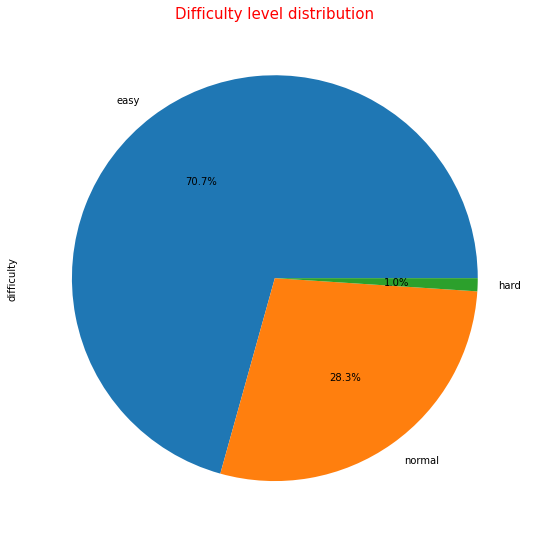

In [49]:
plt.figure(figsize=(20,10))# sizing
plt.subplot(1,2,1)#subplot 1
rcps_list.difficulty.value_counts(normalize=True).plot.pie(autopct='%1.1f%%')
plt.title('Difficulty level distribution',fontdict={'fontsize':15, 'fontweight':10, 'color':'Red'})

- 70.7% recipes are easy
- 28.3% recipes are Normal
- 1.0% recipes are hard

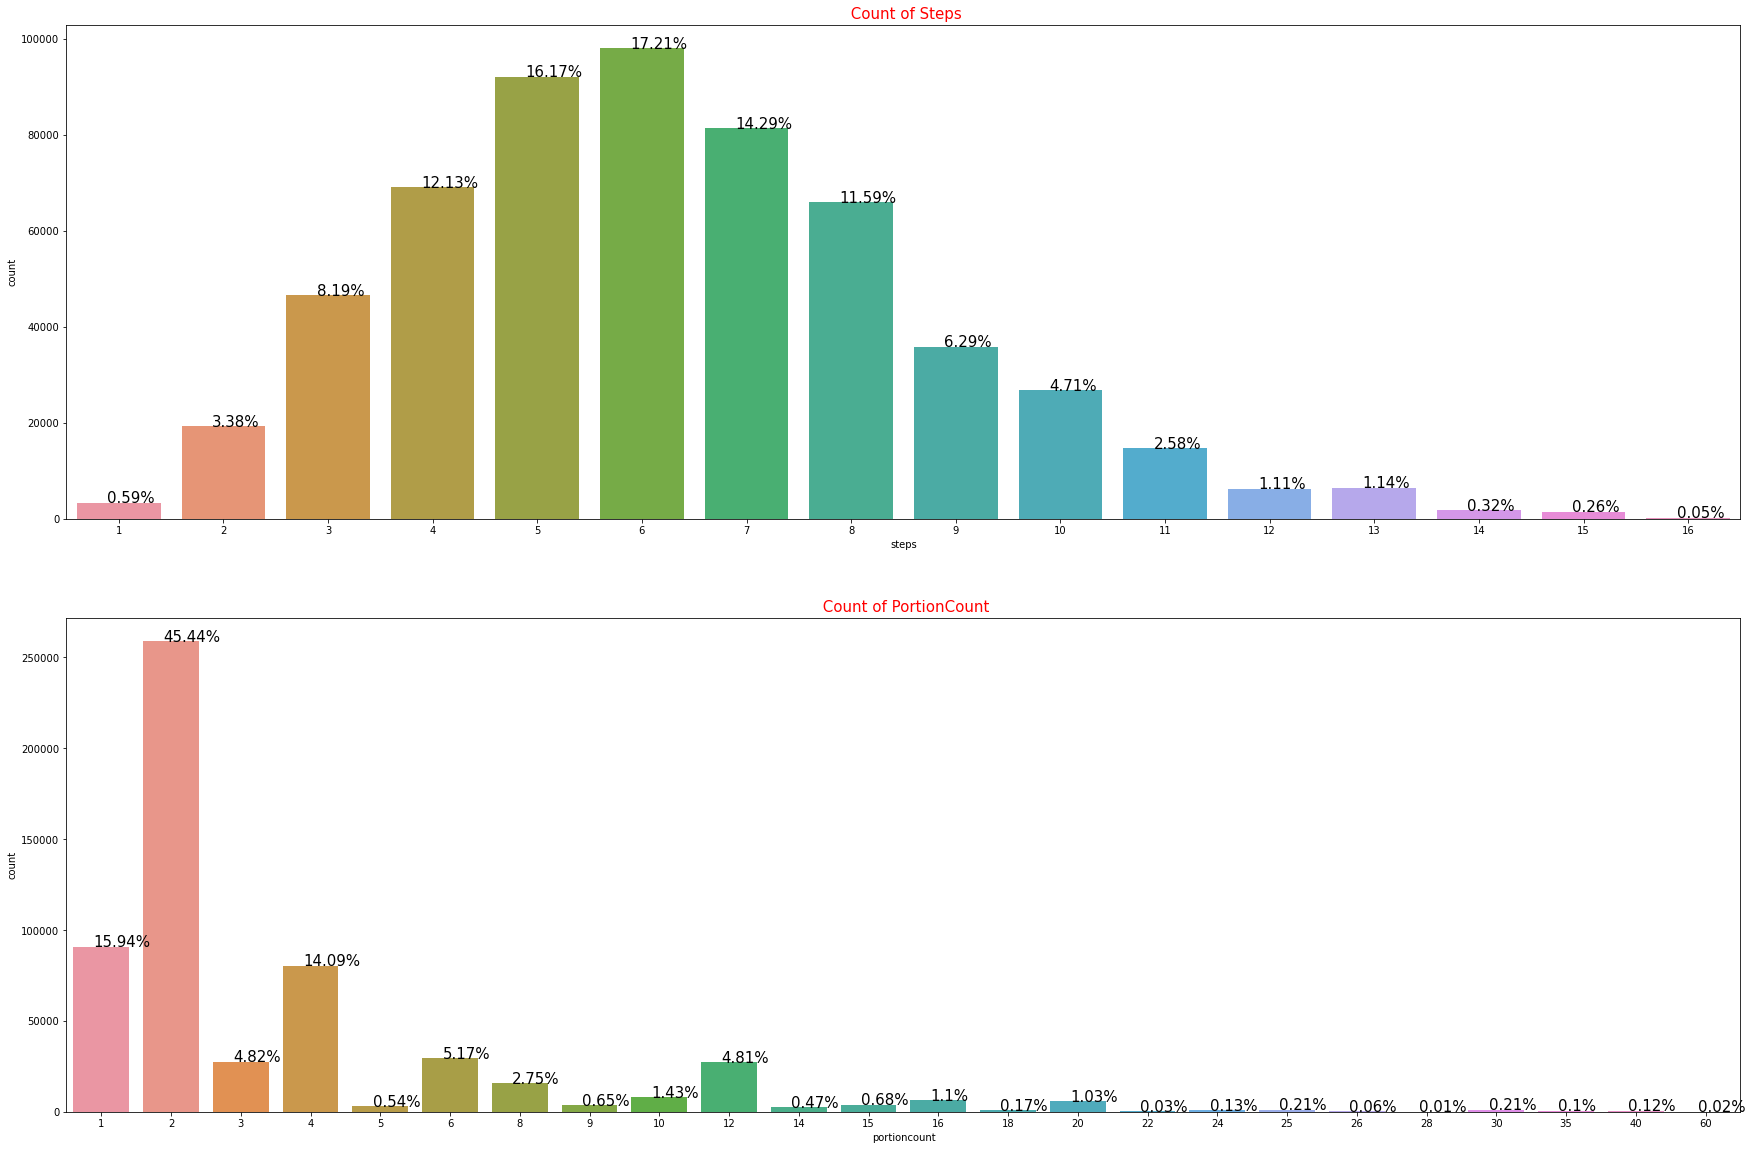

In [50]:
plt.figure(figsize=(30,20))
def ann_h(df):
   
    totals = []

    # find the values and append to list
    for i in df.patches:
        totals.append(i.get_height())

    # set individual bar lables using above list
    total = sum(totals)

    # set individual bar lables using above list
    for i in df.patches:
        # get_x pulls left or right; get_height pushes up or down
        df.text(i.get_x()+.29, i.get_height(), \
                str(round((i.get_height()/total)*100, 2))+'%', fontsize=15)
        
plt.subplot(2,1,1)#subplot 1
st=sns.countplot(rcps['steps'])
plt.title(' Count of Steps',fontdict={'fontsize':15, 'fontweight':10, 'color':'Red'})
ann_h(st)


plt.subplot(2,1,2)#subplot 2
pc=sns.countplot(rcps['portioncount'])
plt.title(' Count of PortionCount',fontdict={'fontsize':15, 'fontweight':10, 'color':'Red'})
ann_h(pc)

plt.show()

- 71.3% of data has between 4 to 8 steps
- 45.44% od recipes have portion count of 2

In [51]:
rcps_list['portioncount'].value_counts()

2     752
4     259
1     202
6      96
3      79
12     75
8      57
10     30
20     18
16     17
5      12
15     10
9       8
14      7
25      4
30      3
40      2
18      2
24      2
22      1
26      1
28      1
35      1
60      1
Name: portioncount, dtype: int64

In [52]:
rcps['locale'].value_counts()

de    81697
fr    53153
en    46055
it    42370
nl    40698
hu    39730
pl    37254
es    36472
ru    33381
cs    25930
el    21589
pt    20368
fi    19598
tr    16011
sv    14905
da    14578
nb    10738
ko     8920
zh     3061
ja     2929
Name: locale, dtype: int64

In [53]:
rcps[rcps['recipe_id']=='134'].sort_values(by=['date','locale','type']) #check

date locale recipe_id                          name                                        description  portioncount  preparationtime difficulty  steps                                       instructions                                               tags  type  no_hits  no_sessions  no_users        dow weekend_day
73952 2022-01-01     cs       134  Banana Oat Breakfast Muffins  Overripe bananas may be too brown to eat, but ...            12               30       easy      5  ["Fill a half a cup with the oats and set to t...  low_fat,snack,breakfast,vegetarian,baking,on_t...   use        2            2         2   Saturday     weekend
73931 2022-01-01     cs       134  Banana Oat Breakfast Muffins  Overripe bananas may be too brown to eat, but ...            12               30       easy      5  ["Fill a half a cup with the oats and set to t...  low_fat,snack,breakfast,vegetarian,baking,on_t...  view       45           36        34   Saturday     weekend
74037 2022-01-01     da       134  Banana Oat Breakfast Muffins  Overripe bananas may be too brown to eat, but ...            12               30       easy      5  ["Fill a half a cup with the oats and set to t...  low_fat,snack,breakfast,vegetarian,baking,on_t...  view       14           11        10   Saturday     weekend
73867 2022-01-01     de       134  Banana Oat Breakfast Muffins  Overripe bananas may be too brown to eat, but ...            12               30       easy      5  ["Fill a half a cup with the oats and set to t...  low_fat,snack,breakfast,vegetarian,baking,on_t...   use       38           29        28   Saturday     weekend
73885 2022-01-01     de       134  Banana Oat Breakfast Muffins  Overripe bananas may be too brown to eat, but ...            12               30       easy      5  ["Fill a half a cup with the oats and set to t...  low_fat,snack,breakfast,vegetarian,baking,on_t...  view      833          717       686   Saturday     weekend
73838 2022-01-01     el       134  Banana Oat Breakfast Muffins  Overripe bananas may be too brown to eat, but ...            12               30       easy      5  ["Fill a half a cup with the oats and set to t...  low_fat,snack,breakfast,vegetarian,baking,on_t...  view        6            4         4   Saturday     weekend
74122 2022-01-01     en       134  Banana Oat Breakfast Muffins  Overripe bananas may be too brown to eat, but ...            12               30       easy      5  ["Fill a half a cup with the oats and set to t...  low_fat,snack,breakfast,vegetarian,baking,on_t...   use        3            2         2   Saturday     weekend
73907 2022-01-01     en       134  Banana Oat Breakfast Muffins  Overripe bananas may be too brown to eat, but ...            12               30       easy      5  ["Fill a half a cup with the oats and set to t...  low_fat,snack,breakfast,vegetarian,baking,on_t...  view       75           63        59   Saturday     weekend
73693 2022-01-01     es       134  Banana Oat Breakfast Muffins  Overripe bananas may be too brown to eat, but ...            12               30       easy      5  ["Fill a half a cup with the oats and set to t...  low_fat,snack,breakfast,vegetarian,baking,on_t...   use        1            1         1   Saturday     weekend
73787 2022-01-01     es       134  Banana Oat Breakfast Muffins  Overripe bananas may be too brown to eat, but ...            12               30       easy      5  ["Fill a half a cup with the oats and set to t...  low_fat,snack,breakfast,vegetarian,baking,on_t...  view       58           47        45   Saturday     weekend
73802 2022-01-01     fi       134  Banana Oat Breakfast Muffins  Overripe bananas may be too brown to eat, but ...            12               30       easy      5  ["Fill a half a cup with the oats and set to t...  low_fat,snack,breakfast,vegetarian,baking,on_t...   use        1            1         1   Saturday     weekend
73776 2022-01-01     fi       134  Banana Oat Breakfast Muffins  Overripe bananas may be

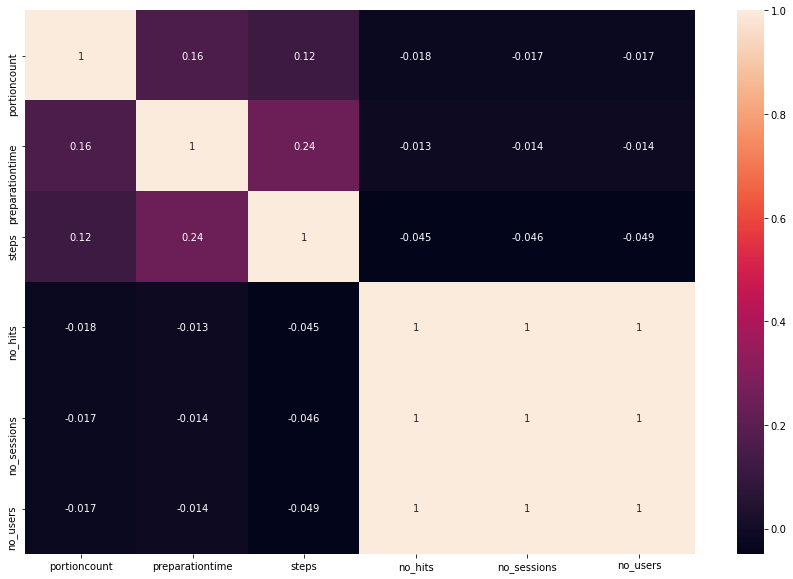

In [54]:
plt.figure(figsize=(15,10))
sns.heatmap(rcps.corr(), annot = True)
plt.show()

- no_users inversely proportional to portioncount,preptime and steps
- no_users is highly corelated to no_session and no_hits

_________________________

## Anylysing features for popular recipes

#### Getting the tags for analysis

In [55]:
#function for pliting the tags to list
def tag(i):
    split_tags = i.lower().split(',')
    return (split_tags)

In [56]:
rcps_list['tag_list']=rcps_list['tags'].apply(lambda x: tag(x))
# creating new column for tga_list for analysis
rcps_list

recipe_id                                               name                                        description  portioncount  preparationtime difficulty  steps                                       instructions                                               tags                                           tag_list
0            100                             Green Spinach Smoothie  When you first hear it, a green smoothie might...             1                5       easy      3  ["Wash the spinach and spin dry. Then, place i...  low_calorie,low_fat,breakfast,snack,vegan,glut...  [low_calorie, low_fat, breakfast, snack, vegan...
842          101                   Catfish Goulash in Paprika Sauce  The meat of the catfish is firm and full of fl...             2               35     normal      8  ["Peel the onions and garlic clove and finely ...  high_protein,low_carb,lunch,dinner,gluten_free...  [high_protein, low_carb, lunch, dinner, gluten...
1131         102                           Chicken Paella with Peas  Paella is a traditional Spanish meal usually p...             2               60     normal     10  ["Mix 1 tsp. of olive oil and the paprika powd...  low_fat,lunch,dinner,lactose_free,gluten_free,...  [low_fat, lunch, dinner, lactose_free, gluten_...
1622         103             Lime Quinoa with BBQ Chicken & Avocado  This recipe isn't just an eye-catcher, it's a ...             4               30       hard      9  ["Cut the chicken into bite-sized pieces and s...             lunch,dinner,lactose_free,meat,400kcal       [lunch, dinner, lactose_free, meat, 400kcal]
2223         104                           Avocado Chocolate Mousse  A healthy alternative for chocolate lovers. Ou...             2                5       easy      3  ["Cut, pit and peel the avocado.","Mix with th...  low_carb,snack,vegan,vegetarian,gluten_free,la...  [low_carb, snack, vegan, vegetarian, gluten_fr...
2764         105               Marinated Beefsteak with Green Beans  The beefsteak and green beans are sautéed in t...             2               30     normal      9  ["Peel and finely chop the garlic clove and cu...  low_carb,high_protein,lunch,dinner,gluten_free...  [low_carb, high_protein, lunch, dinner, gluten...
3144         106           Cream Cheese & Spinach Rolls with Salmon  Our cream cheese and spinach rolls with salmon...             1               20     normal      6  ["Put 1 egg in the blender, separate the secon...  low_carb,dinner,lunch,gluten_free,sugar_free,f...  [low_carb, dinner, lunch, gluten_free, sugar_f...
3526         107                              Chicken & Potato Dish  There are a lot of frozen vegetable dishes, bu...             2               20     normal      6  ["Put the beans in a small pot of boiling wate...  low_calorie,low_fat,lunch,dinner,gluten_free,l...  [low_calorie, low_fat, lunch, dinner, gluten_f...
4423         108                         Potato Curry with Eggplant  Our potato curry with eggplant and light cocon...             1               40     normal      5  ["Cut the potatoes, eggplant, mushrooms and on...  low_calorie,lunch,dinner,gluten_free,lactose_f...  [low_calorie, lunch, dinner, gluten_free, lact...
4925         109                         Potato & Spinach Casserole  This casserole most certainly lives up to the ...             2               45     normal      7  ["Cut the potatoes into thin slices and lay in...  low_calorie,low_fat,lunch,dinner,casserole,veg...  [low_calorie, low_fat, lunch, dinner, casserol...
5620          10                   Sugar-free Bottomless Cheesecake  This cheesecake  can be prepared quickly and o...             8              180       hard      9  ["Coat a springform pan (Ø 18 cm \/ 7.1 inch) ...  low_carb,vegetarian,gluten_free,sugar_free,des...  [low_carb, vegetarian, gluten_free, sugar_free...
6135         110                                      One-Pot Pasta  Not in the mood to dirty a bunch of dishes? Th...             1               15      

In [57]:
def to_1D(series):
     return pd.Series([x for _list in series for x in _list])

In [58]:
to_1D(rcps_list['tag_list']).value_counts() #getting the count of tags used in recipes

easy               1159
vegetarian         1153
lactose_free       1097
lunch              1007
dinner             1005
gluten_free         947
sugar_free          854
vegetables          773
on_the_go           684
vegan               673
low_carb            619
clean_eating        520
sweet               431
high_fiber          431
breakfast           429
snack               374
few_ingredients     346
low_fat             345
meat                325
fruits              316
dessert             316
300kcal             315
400kcal             295
200kcal             291
low_calorie         271
500kcal             252
fast                220
100kcal             207
baking              189
salad               178
high_protein        177
detox               160
christmas           150
ketogenic           134
600kcal             125
fish                112
pescatarian          99
soup                 98
casserole            77
50kcal               67
700kcal              67
smoothie        

Text(0.5, 1.0, 'Distribution of the tags')

<Figure size 2160x1440 with 0 Axes>

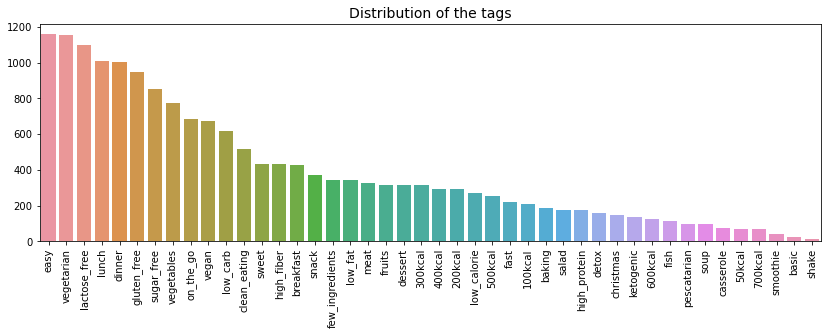

In [59]:
plt.figure(figsize=(30,20))
fig, ax = plt.subplots(figsize = (14,4))
ax=sns.barplot(to_1D(rcps_list["tag_list"]).value_counts().index,
        to_1D(rcps_list["tag_list"]).value_counts().values)



plt.xticks(rotation=90)
ax.set_title("Distribution of the tags", size = 14)

In [60]:
text_tag = " ".join(cat for cat in rcps_list['tags'])

In [61]:
text_tag

'low_calorie,low_fat,breakfast,snack,vegan,gluten_free,sugar_free,vegetarian,lactose_free,clean_eating,detox,smoothie,fruits,vegetables,200kcal,easy,few_ingredients,fast high_protein,low_carb,lunch,dinner,gluten_free,lactose_free,sugar_free,fish,pescatarian,300kcal low_fat,lunch,dinner,lactose_free,gluten_free,sugar_free,meat,600kcal lunch,dinner,lactose_free,meat,400kcal low_carb,snack,vegan,vegetarian,gluten_free,lactose_free,clean_eating,dessert,high_fiber,sweet,christmas,200kcal,easy,fast low_carb,high_protein,lunch,dinner,gluten_free,christmas,meat,300kcal low_carb,dinner,lunch,gluten_free,sugar_free,few_ingredients,fish,pescatarian,400kcal low_calorie,low_fat,lunch,dinner,gluten_free,lactose_free,clean_eating,sugar_free,meat,vegetables,200kcal low_calorie,lunch,dinner,gluten_free,lactose_free,vegetarian,vegan,detox,vegetables,400kcal low_calorie,low_fat,lunch,dinner,casserole,vegetables,400kcal low_carb,vegetarian,gluten_free,sugar_free,dessert,baking,sweet,200kcal low_fat,lunch,

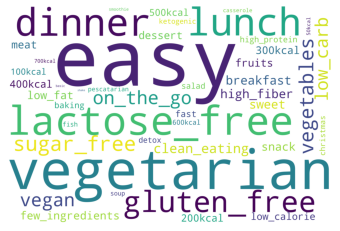

In [62]:
 from wordcloud import WordCloud, STOPWORDS
    
    # Generate word cloud
word_cloud = WordCloud(
        width=3000,
        height=2000,
        random_state=1,
        background_color="white",
        collocations=False,
        stopwords=STOPWORDS,
        ).generate(text_tag)
        # Display the generated Word Cloud
plt.imshow(word_cloud)
plt.axis("off")
plt.show()

- the most popular 10 tags in order are easy,
vegetarian,
lactose_free,
lunch,
dinner,
gluten_free,
sugar_free,
vegetables,
on_the_go,
vegan


------------

We will measure success based on the used vs views 
- success= no of users used the recipe/ no of users that viewed

In [63]:
lists=rcps[['recipe_id','name','locale','no_hits','no_sessions','no_users','type']] #selecting only required columns

lists=lists.groupby(['recipe_id','name','type']).sum().sort_values(by='no_users', ascending=False) #creating list by grouping of recipe and sum of users

In [64]:
lists

no_hits  no_sessions  no_users
recipe_id name                               type                                
366       Mozzarella Pan Pizza               view   119072        99288     91074
76        Scrambled Eggs with Spinach & Feta view   106914        87978     80953
412       Egg Salad                          view    97957        82420     76541
121       Greek Yogurt & Blueberry Soufflé   view    95683        78599     70300
365       Basic Porridge                     view    87442        72284     68639
...                                                    ...          ...       ...
1592      Strawberry Cobbler                 use         1            1         1
1370      Grilled Watermelon                 use         1            1         1
1099      Savory Energy Balls                use         1            1         1
1549      Caffeine-Free Moringa Latte        use         1            1         1
1452      Cherry Açai Bowl                   use         2            2         1

[3187 rows x 3 columns]

In [65]:
lists.reset_index(inplace=True)
lists

recipe_id                                name  type  no_hits  no_sessions  no_users
0          366                Mozzarella Pan Pizza  view   119072        99288     91074
1           76  Scrambled Eggs with Spinach & Feta  view   106914        87978     80953
2          412                           Egg Salad  view    97957        82420     76541
3          121    Greek Yogurt & Blueberry Soufflé  view    95683        78599     70300
4          365                      Basic Porridge  view    87442        72284     68639
...        ...                                 ...   ...      ...          ...       ...
3182      1592                  Strawberry Cobbler   use        1            1         1
3183      1370                  Grilled Watermelon   use        1            1         1
3184      1099                 Savory Energy Balls   use        1            1         1
3185      1549         Caffeine-Free Moringa Latte   use        1            1         1
3186      1452                    Cherry Açai Bowl   use        2            2         1

[3187 rows x 6 columns]

In [66]:
# create colmns for no of use and views
lists['view']=lists.apply(lambda x: x['no_users'] if x['type']=='view' else 0, axis=1)
lists['used']=lists.apply(lambda x: x['no_users'] if x['type']=='use' else 0, axis=1)

In [67]:
lists

recipe_id                                name  type  no_hits  no_sessions  no_users   view  used
0          366                Mozzarella Pan Pizza  view   119072        99288     91074  91074     0
1           76  Scrambled Eggs with Spinach & Feta  view   106914        87978     80953  80953     0
2          412                           Egg Salad  view    97957        82420     76541  76541     0
3          121    Greek Yogurt & Blueberry Soufflé  view    95683        78599     70300  70300     0
4          365                      Basic Porridge  view    87442        72284     68639  68639     0
...        ...                                 ...   ...      ...          ...       ...    ...   ...
3182      1592                  Strawberry Cobbler   use        1            1         1      0     1
3183      1370                  Grilled Watermelon   use        1            1         1      0     1
3184      1099                 Savory Energy Balls   use        1            1         1      0     1
3185      1549         Caffeine-Free Moringa Latte   use        1            1         1      0     1
3186      1452                    Cherry Açai Bowl   use        2            2         1      0     1

[3187 rows x 8 columns]

In [68]:
u=lists.loc[lists['used']!=0]
used=dict(zip(u['recipe_id'],u['used']))

In [69]:
v=lists.loc[lists['view']!=0]
views=dict(zip(v['recipe_id'],v['view']))

In [70]:
rate={x:float(((used[x])/views[x])*100) for x in used}
rate #dictionary with success rate

{'365': 9.97100773612669,
 '404': 10.861576823386594,
 '121': 8.143669985775249,
 '127': 9.888130779621099,
 '366': 6.123591804466697,
 '76': 5.933072276506121,
 '221': 10.44620418227512,
 '319': 9.256260907963076,
 '412': 5.713277851086346,
 '798': 11.754647849097571,
 '134': 7.23402664872643,
 '84': 8.11965811965812,
 '407': 10.462960237807929,
 '177': 6.461696884998713,
 '107': 8.252907696114823,
 '182': 7.665399594225882,
 '307': 9.856587263004375,
 '270': 9.988837505979907,
 '492': 5.460971277874456,
 '197': 9.138148387295145,
 '38': 5.591805766312595,
 '147': 8.038321915003959,
 '397': 7.777925708960192,
 '493': 7.8583555663351925,
 '18': 7.380454557797268,
 '80': 7.365145228215768,
 '309': 7.279039166829978,
 '114': 5.436373520679128,
 '243': 5.304777594728172,
 '204': 6.317100510648897,
 '392': 5.853214010327826,
 '352': 4.448700410396716,
 '235': 8.474637031726116,
 '109': 7.123178645769561,
 '298': 8.240750728076799,
 '367': 5.747038005847053,
 '385': 6.319670227589411,
 '299

In [71]:
lists['s_rate']=lists['recipe_id'].map(rate) #create the cols with success rate

In [72]:
lists['s_rate']=round(lists['s_rate'],2)

In [73]:
lists

recipe_id                                name  type  no_hits  no_sessions  no_users   view  used  s_rate
0          366                Mozzarella Pan Pizza  view   119072        99288     91074  91074     0    6.12
1           76  Scrambled Eggs with Spinach & Feta  view   106914        87978     80953  80953     0    5.93
2          412                           Egg Salad  view    97957        82420     76541  76541     0    5.71
3          121    Greek Yogurt & Blueberry Soufflé  view    95683        78599     70300  70300     0    8.14
4          365                      Basic Porridge  view    87442        72284     68639  68639     0    9.97
...        ...                                 ...   ...      ...          ...       ...    ...   ...     ...
3182      1592                  Strawberry Cobbler   use        1            1         1      0     1    1.41
3183      1370                  Grilled Watermelon   use        1            1         1      0     1    0.79
3184      1099                 Savory Energy Balls   use        1            1         1      0     1    0.10
3185      1549         Caffeine-Free Moringa Latte   use        1            1         1      0     1    0.10
3186      1452                    Cherry Açai Bowl   use        2            2         1      0     1    0.30

[3187 rows x 9 columns]

In [74]:
lists['s_rate'].isna().sum()

13

In [75]:
lists.loc[lists['s_rate'].isna()]

recipe_id                                       name  type  no_hits  no_sessions  no_users  view  used  s_rate
1655       978                                Matcha Bowl  view      535          498       480   480     0     NaN
1768      1353                           Vegan Liver Pâté  view      371          351       348   348     0     NaN
1934       473                 Melon & Mozzarella Skewers  view      246          218       216   216     0     NaN
1946      1225  Water Cress Salad with Plums & Prosciutto  view      216          207       205   205     0     NaN
2016       726                      Spinach Artichoke Dip  view      192          176       171   171     0     NaN
2018      1104             Vegan Cheese Dip with Grissini  view      178          172       171   171     0     NaN
2100       621                    Grilled Corn on the Cob  view      143          137       137   137     0     NaN
2176      1390         Grilled Nectarines with Mozzarella  view      126          119       117   117     0     NaN
2364      1308                            Cranberry Sauce  view       80           71        71    71     0     NaN
2465      1593   Carrot Zucchini Pasta with Avocado Sauce  view       68           57        57    57     0     NaN
2474      1045                     Pkhali (Spinach Balls)  view       58           57        56    56     0     NaN
2601      1594                     Creamy Coconut Chicken  view       44           41        41    41     0     NaN
2720      1591                 Spinach Salad with Berries  view       32           32        31    31     0     NaN

- looks like these recipes have not been used yet

In [76]:
lists['s_rate'].value_counts()

2.20     16
1.71     16
1.20     14
1.60     14
2.64     14
2.29     14
5.54     14
2.56     12
1.54     12
0.97     12
5.70     12
2.34     12
2.30     12
1.69     12
2.36     12
1.41     12
3.72     12
1.83     12
4.83     12
2.98     12
5.87     12
2.54     10
5.04     10
2.13     10
2.96     10
4.28     10
3.88     10
5.46     10
3.00     10
2.43     10
1.05     10
5.30     10
1.52     10
4.66     10
2.00     10
1.28     10
2.12     10
3.06     10
2.03     10
1.96     10
3.35     10
1.82     10
1.16     10
2.24     10
3.48     10
2.95     10
2.22     10
2.91     10
3.47     10
4.00     10
2.73     10
3.27      8
2.16      8
1.81      8
4.06      8
3.41      8
4.17      8
1.32      8
4.37      8
3.37      8
4.11      8
5.47      8
2.66      8
4.20      8
3.86      8
4.18      8
1.46      8
0.81      8
4.62      8
1.48      8
1.80      8
5.42      8
5.86      8
4.07      8
3.89      8
0.56      8
3.44      8
3.54      8
2.18      8
2.46      8
4.85      8
3.29      8
1.29      8
6.36

In [77]:
lists['s_rate']=lists['s_rate'].fillna(0)

- replace NA with 0 as the recipe was not used yet

In [78]:
lists =lists.sort_values(by='s_rate', ascending=False)
lists

recipe_id                                       name  type  no_hits  no_sessions  no_users   view  used  s_rate
277       1543                  Potato Broccoli Casserole  view    10004         7906      6523   6523     0   14.27
1314      1543                  Potato Broccoli Casserole   use     1367         1104       931      0   931   14.27
1057      1416                          Gnocchi Casserole   use     1986         1613      1414      0  1414   12.80
169       1416                          Gnocchi Casserole  view    16596        13120     11043  11043     0   12.80
1923      1042                       Carrot & Orange Soup   use      277          238       221      0   221   12.49
...        ...                                        ...   ...      ...          ...       ...    ...   ...     ...
1768      1353                           Vegan Liver Pâté  view      371          351       348    348     0    0.00
1934       473                 Melon & Mozzarella Skewers  view      246          218       216    216     0    0.00
1946      1225  Water Cress Salad with Plums & Prosciutto  view      216          207       205    205     0    0.00
2176      1390         Grilled Nectarines with Mozzarella  view      126          119       117    117     0    0.00
1655       978                                Matcha Bowl  view      535          498       480    480     0    0.00

[3187 rows x 9 columns]

In [79]:
lists.columns

Index(['recipe_id', 'name', 'type', 'no_hits', 'no_sessions', 'no_users', 'view', 'used', 's_rate'], dtype='object')

In [80]:
lists.drop(['no_hits', 'no_sessions','view', 'used'],inplace=True,axis=1)
lists

recipe_id                                       name  type  no_users  s_rate
277       1543                  Potato Broccoli Casserole  view      6523   14.27
1314      1543                  Potato Broccoli Casserole   use       931   14.27
1057      1416                          Gnocchi Casserole   use      1414   12.80
169       1416                          Gnocchi Casserole  view     11043   12.80
1923      1042                       Carrot & Orange Soup   use       221   12.49
...        ...                                        ...   ...       ...     ...
1768      1353                           Vegan Liver Pâté  view       348    0.00
1934       473                 Melon & Mozzarella Skewers  view       216    0.00
1946      1225  Water Cress Salad with Plums & Prosciutto  view       205    0.00
2176      1390         Grilled Nectarines with Mozzarella  view       117    0.00
1655       978                                Matcha Bowl  view       480    0.00

[3187 rows x 5 columns]

In [81]:
lists

recipe_id                                       name  type  no_users  s_rate
277       1543                  Potato Broccoli Casserole  view      6523   14.27
1314      1543                  Potato Broccoli Casserole   use       931   14.27
1057      1416                          Gnocchi Casserole   use      1414   12.80
169       1416                          Gnocchi Casserole  view     11043   12.80
1923      1042                       Carrot & Orange Soup   use       221   12.49
...        ...                                        ...   ...       ...     ...
1768      1353                           Vegan Liver Pâté  view       348    0.00
1934       473                 Melon & Mozzarella Skewers  view       216    0.00
1946      1225  Water Cress Salad with Plums & Prosciutto  view       205    0.00
2176      1390         Grilled Nectarines with Mozzarella  view       117    0.00
1655       978                                Matcha Bowl  view       480    0.00

[3187 rows x 5 columns]

In [82]:
top=lists.head(200) #top 200 popular recipes
top

recipe_id                                               name  type  no_users  s_rate
277       1543                          Potato Broccoli Casserole  view      6523   14.27
1314      1543                          Potato Broccoli Casserole   use       931   14.27
1057      1416                                  Gnocchi Casserole   use      1414   12.80
169       1416                                  Gnocchi Casserole  view     11043   12.80
1923      1042                               Carrot & Orange Soup   use       221   12.49
919       1042                               Carrot & Orange Soup  view      1769   12.49
2130      1109                            Carrot & Peanut Risotto   use       128   11.78
1234      1109                            Carrot & Peanut Risotto  view      1087   11.78
29         798                              Beef Noodle Casserole  view     36845   11.75
427        798                              Beef Noodle Casserole   use      4331   11.75
1529      1088                    Couscous Salad with Bell Pepper   use       624   11.52
333       1088                    Couscous Salad with Bell Pepper  view      5417   11.52
1617      1158                        Sage Gnocchi with Diced Ham   use       516   11.45
396       1158                        Sage Gnocchi with Diced Ham  view      4507   11.45
629        729                                   Mushroom Risotto  view      2887   11.40
1783       729                                   Mushroom Risotto   use       329   11.40
1834      1090                               Potato & Tomato Stew   use       283   11.37
708       1090                               Potato & Tomato Stew  view      2490   11.37
1164       936                                   Potato Leek Soup  view      1220   11.31
2096       936                                   Potato Leek Soup   use       138   11.31
321        994                                                BLT  view      5610   11.23
1527       994                                                BLT   use       630   11.23
1447       568                                  Chicken Fricassee   use       743   11.02
271        568                                  Chicken Fricassee  view      6741   11.02
1629      1125                            Basic Semolina Porridge   use       505   10.96
390       1125                            Basic Semolina Porridge  view      4608   10.96
2226      1034          Eggs in Mustard Sauce with Mashed Carrots   use       105   10.87
1297      1034          Eggs in Mustard Sauce with Mashed Carrots  view       966   10.87
274        404                    Chicken Curry with Basmati Rice   use      6621   10.86
6          404                    Chicken Curry with Basmati Rice  view     60958   10.86
830        815                                    Creamy Pea Soup  view      2024   10.77
1930       815                                    Creamy Pea Soup   use       218   10.77
342       1162                     Overnight Oats with Applesauce  view      5323   10.75
1569      1162                     Overnight Oats with Applesauce   use       572   10.75
2493      1071                                 Pea & Arugula Soup   use        54   10.49
1618      1071                                 Pea & Arugula Soup  view       515   10.49
1023      1047                           Eggplant & Zucchini Dish  view      1489   10.48
2057      1047                           Eggplant & Zucchini Dish   use       156   10.48
520        407                              Garlic Mushroom Pasta   use      3555   10.46
38         407                              Garlic Mushroom Pasta  view     33977   10.46
20         221     Ground Beef & Sweet Potato Casserole with Feta  view     42178   10.45
412        221     Ground Beef & Sweet Potato Casserole with Feta   use      4406   10.45
377        614                      Couscous-Stuffed Bell Peppers  view      4784   10.31
1641       614                      Couscous-

In [83]:
top.reset_index(inplace=True) #remove index for analysis

In [84]:
top[['recipe_id','name']]

recipe_id                                               name
0        1543                          Potato Broccoli Casserole
1        1543                          Potato Broccoli Casserole
2        1416                                  Gnocchi Casserole
3        1416                                  Gnocchi Casserole
4        1042                               Carrot & Orange Soup
5        1042                               Carrot & Orange Soup
6        1109                            Carrot & Peanut Risotto
7        1109                            Carrot & Peanut Risotto
8         798                              Beef Noodle Casserole
9         798                              Beef Noodle Casserole
10       1088                    Couscous Salad with Bell Pepper
11       1088                    Couscous Salad with Bell Pepper
12       1158                        Sage Gnocchi with Diced Ham
13       1158                        Sage Gnocchi with Diced Ham
14        729                                   Mushroom Risotto
15        729                                   Mushroom Risotto
16       1090                               Potato & Tomato Stew
17       1090                               Potato & Tomato Stew
18        936                                   Potato Leek Soup
19        936                                   Potato Leek Soup
20        994                                                BLT
21        994                                                BLT
22        568                                  Chicken Fricassee
23        568                                  Chicken Fricassee
24       1125                            Basic Semolina Porridge
25       1125                            Basic Semolina Porridge
26       1034          Eggs in Mustard Sauce with Mashed Carrots
27       1034          Eggs in Mustard Sauce with Mashed Carrots
28        404                    Chicken Curry with Basmati Rice
29        404                    Chicken Curry with Basmati Rice
30        815                                    Creamy Pea Soup
31        815                                    Creamy Pea Soup
32       1162                     Overnight Oats with Applesauce
33       1162                     Overnight Oats with Applesauce
34       1071                                 Pea & Arugula Soup
35       1071                                 Pea & Arugula Soup
36       1047                           Eggplant & Zucchini Dish
37       1047                           Eggplant & Zucchini Dish
38        407                              Garlic Mushroom Pasta
39        407                              Garlic Mushroom Pasta
40        221     Ground Beef & Sweet Potato Casserole with Feta
41        221     Ground Beef & Sweet Potato Casserole with Feta
42        614                      Couscous-Stuffed Bell Peppers
43        614                      Couscous-Stuffed Bell Peppers
44       1069              Mediterranean Oven-Roasted Vegetables
45       1069              Mediterranean Oven-Roasted Vegetables
46        519                                    Pumpkin Risotto
47        519                                    Pumpkin Risotto
48        996        Meatloaf with Mashed Potatoes & Green Beans
49        996        Meatloaf with Mashed Potatoes & Green Beans
50        270                Cheese & Leek Soup with Ground Beef
51        270                Cheese & Leek Soup with Ground Beef
52        365                                     Basic Porridge
53        365                                     Basic Porridge
54       1113                      Orzo with Zucchini & Tomatoes
55       1113                      Orzo with Zucchini & Tomatoes
56        120                  Kohlrabi Lasagne with Ground Beef
57        120                  Kohlrabi Lasagne with Ground Beef
58        127                Sesame Chicken with Rice & Broccoli
59        127                Sesame Chicken with Rice & Broccoli
60        307                          

In [85]:
top_l=list(top['recipe_id'])
top_l #popuar recipe_id list

['1543',
 '1543',
 '1416',
 '1416',
 '1042',
 '1042',
 '1109',
 '1109',
 '798',
 '798',
 '1088',
 '1088',
 '1158',
 '1158',
 '729',
 '729',
 '1090',
 '1090',
 '936',
 '936',
 '994',
 '994',
 '568',
 '568',
 '1125',
 '1125',
 '1034',
 '1034',
 '404',
 '404',
 '815',
 '815',
 '1162',
 '1162',
 '1071',
 '1071',
 '1047',
 '1047',
 '407',
 '407',
 '221',
 '221',
 '614',
 '614',
 '1069',
 '1069',
 '519',
 '519',
 '996',
 '996',
 '270',
 '270',
 '365',
 '365',
 '1113',
 '1113',
 '120',
 '120',
 '127',
 '127',
 '307',
 '307',
 '963',
 '963',
 '178',
 '178',
 '804',
 '804',
 '586',
 '586',
 '319',
 '319',
 '1496',
 '1496',
 '554',
 '554',
 '197',
 '197',
 '17',
 '17',
 '126',
 '126',
 '1410',
 '1410',
 '1418',
 '1418',
 '830',
 '830',
 '1171',
 '1171',
 '990',
 '1536',
 '1536',
 '990',
 '935',
 '935',
 '497',
 '497',
 '1078',
 '1078',
 '1442',
 '1442',
 '96',
 '96',
 '140',
 '140',
 '183',
 '183',
 '186',
 '186',
 '489',
 '598',
 '489',
 '598',
 '536',
 '536',
 '1478',
 '1478',
 '1129',
 '1302'

In [86]:
btm=lists.tail(200) #bottom 200 recipes 
btm.reset_index(inplace=True)
btm

index recipe_id                                       name  type  no_users  s_rate
0     2912      1291                              Kale Brownies   use        18    1.00
1     2858       432                  Coconut Pineapple Popcorn   use        21    1.00
2      812       432                  Coconut Pineapple Popcorn  view      2107    1.00
3     2960      1119             Edamame Dip with Veggie Sticks   use        15    0.99
4     1012      1119             Edamame Dip with Veggie Sticks  view      1513    0.99
5     2500      1580        Baked Coconut Shrimp with Curry Dip   use        53    0.99
6      340      1580        Baked Coconut Shrimp with Curry Dip  view      5348    0.99
7     1167      1208   Smoothie Bowl with Pomegranate & Berries  view      1219    0.98
8     2997      1208   Smoothie Bowl with Pomegranate & Berries   use        12    0.98
9     3152      1528                      Broccoli Cress Spread   use         4    0.98
10    2829      1583       Mango Ginger Chutney with Naan Bread   use        23    0.98
11     745      1583       Mango Ginger Chutney with Naan Bread  view      2347    0.98
12     932       693                     Almond Butter Pancakes  view      1732    0.98
13    2932       693                     Almond Butter Pancakes   use        17    0.98
14    1721      1528                      Broccoli Cress Spread  view       410    0.98
15    1214      1362                        Grilled Carrot Dogs  view      1132    0.97
16    3143      1365          Eggplant Skewers with Onion Salsa   use         4    0.97
17    2881      1573                         Peach Almond Crisp   use        20    0.97
18     665       322                              Korean Kimchi  view      2682    0.97
19    3145       613                   Triple-Flavored BBQ Dips   use         4    0.97
20    1717       613                   Triple-Flavored BBQ Dips  view       413    0.97
21    1720      1365          Eggplant Skewers with Onion Salsa  view       411    0.97
22    3013      1362                        Grilled Carrot Dogs   use        11    0.97
23    3106      1337                       White Christmas Bars   use         6    0.97
24    1532      1337                       White Christmas Bars  view       621    0.97
25     818      1573                         Peach Almond Crisp  view      2068    0.97
26    2781       322                              Korean Kimchi   use        26    0.97
27    3066      1142                         Coconut Nice Cream   use         9    0.96
28    1311      1142                         Coconut Nice Cream  view       936    0.96
29     488      1517                       Fruity Infused Water  view      3731    0.96
30    2656      1517                       Fruity Infused Water   use        36    0.96
31    1376      1364        Grilled Peaches with Yogurt & Honey  view       844    0.95
32    3074      1364        Grilled Peaches with Yogurt & Honey   use         8    0.95
33    3018      1527   Chocolate Almond Fudge with Goji Berries   use        11    0.95
34    2669       872                              Keto Porridge   use        35    0.95
35     498       872                              Keto Porridge  view      3682    0.95
36    1198      1527   Chocolate Almond Fudge with Goji Berries  view      1160    0.95
37     314       668                           Deviled Potatoes  view      5743    0.94
38    2492       668                           Deviled Potatoes   use        54    0.94
39     884       839                 Mini Blueberry Vegan Cakes  view      1836    0.93
40    3031       844                             Chocolate Chai   use        11    0.93
41    2923       839                 Mini Blueberry Vegan Cakes   use        17    0.93
42    1185       844                             Chocolate Chai  view      1187    0.93
43    3114      1501           Raw Cucumber Pasta with Tsatsiki   use         6    0.92
44    1514      1501           Raw Cucumber P

In [87]:
btm_l=list(btm['recipe_id'])
btm_l #least popular recipe_id list

['1291',
 '432',
 '432',
 '1119',
 '1119',
 '1580',
 '1580',
 '1208',
 '1208',
 '1528',
 '1583',
 '1583',
 '693',
 '693',
 '1528',
 '1362',
 '1365',
 '1573',
 '322',
 '613',
 '613',
 '1365',
 '1362',
 '1337',
 '1337',
 '1573',
 '322',
 '1142',
 '1142',
 '1517',
 '1517',
 '1364',
 '1364',
 '1527',
 '872',
 '872',
 '1527',
 '668',
 '668',
 '839',
 '844',
 '839',
 '844',
 '1501',
 '1501',
 '760',
 '760',
 '1500',
 '1500',
 '1329',
 '1329',
 '339',
 '339',
 '1197',
 '1221',
 '1197',
 '1221',
 '521',
 '521',
 '1248',
 '1347',
 '1372',
 '1248',
 '1347',
 '1372',
 '1518',
 '1518',
 '1575',
 '329',
 '329',
 '1575',
 '1114',
 '1114',
 '1522',
 '1522',
 '1564',
 '1564',
 '477',
 '477',
 '1193',
 '1370',
 '1193',
 '1370',
 '904',
 '904',
 '1223',
 '1223',
 '1320',
 '1485',
 '1485',
 '1320',
 '1136',
 '511',
 '1213',
 '1213',
 '1136',
 '511',
 '648',
 '1332',
 '648',
 '1581',
 '1332',
 '1581',
 '1381',
 '1598',
 '1598',
 '1381',
 '1375',
 '1375',
 '1313',
 '1600',
 '1313',
 '1600',
 '920',
 '920',

In [88]:
top_200= pd.merge(rcps_list, top, how= 'right',on='recipe_id') #get the top 200 recipes and its details

In [89]:
top_200

recipe_id                                             name_x                                        description  portioncount  preparationtime difficulty  steps                                       instructions                                               tags                                           tag_list  index                                             name_y  type  no_users  s_rate
0        1543                          Potato Broccoli Casserole  Our Potato Broccoli Casserole is a dish to eat...             6               40       easy      8  ["Preheat the oven to 395°F (200°C).","Cut the...  dinner,lunch,vegetables,casserole,vegetarian,3...  [dinner, lunch, vegetables, casserole, vegetar...    277                          Potato Broccoli Casserole  view      6523   14.27
1        1543                          Potato Broccoli Casserole  Our Potato Broccoli Casserole is a dish to eat...             6               40       easy      8  ["Preheat the oven to 395°F (200°C).","Cut the...  dinner,lunch,vegetables,casserole,vegetarian,3...  [dinner, lunch, vegetables, casserole, vegetar...   1314                          Potato Broccoli Casserole   use       931   14.27
2        1416                                  Gnocchi Casserole  You can whip up this Gnocchi Casserole in no t...             4               34       easy      9  ["Preheat the oven to 360°F (180°C).","Heat 1⁄...  dinner,lunch,casserole,vegetarian,sugar_free,v...  [dinner, lunch, casserole, vegetarian, sugar_f...   1057                                  Gnocchi Casserole   use      1414   12.80
3        1416                                  Gnocchi Casserole  You can whip up this Gnocchi Casserole in no t...             4               34       easy      9  ["Preheat the oven to 360°F (180°C).","Heat 1⁄...  dinner,lunch,casserole,vegetarian,sugar_free,v...  [dinner, lunch, casserole, vegetarian, sugar_f...    169                                  Gnocchi Casserole  view     11043   12.80
4        1042                               Carrot & Orange Soup  With freshly-squeezed orange juice, our Carrot...             2               40       easy      7  ["Start by chopping the carrots into pieces. P...  low_calorie,dinner,lunch,vegan,vegetarian,lact...  [low_calorie, dinner, lunch, vegan, vegetarian...   1923                               Carrot & Orange Soup   use       221   12.49
5        1042                               Carrot & Orange Soup  With freshly-squeezed orange juice, our Carrot...             2               40       easy      7  ["Start by chopping the carrots into pieces. P...  low_calorie,dinner,lunch,vegan,vegetarian,lact...  [low_calorie, dinner, lunch, vegan, vegetarian...    919                               Carrot & Orange Soup  view      1769   12.49
6        1109                            Carrot & Peanut Risotto  Our Carrot & Peanut Risotto is super creamy an...             2               35       easy      6  ["Peel and finely chop the onion, and grate th...  dinner,lunch,vegan,vegetarian,lactose_free,veg...  [dinner, lunch, vegan, vegetarian, lactose_fre...   2130                            Carrot & Peanut Risotto   use       128   11.78
7        1109                            Carrot & Peanut Risotto  Our Carrot & Peanut Risotto is super creamy an...             2               35       easy      6  ["Peel and finely chop the onion, and grate th...  dinner,lunch,vegan,vegetarian,lactose_free,veg...  [dinner, lunch, vegan, vegetarian, lactose_fre...   1234                            Carrot & Peanut Risotto  view      1087   11.78
8         798                              Beef Noodle Casserole  For a lot of people, noodle casseroles bring b...             6               45       easy     10  ["Preheat the oven to 180°C \/ 360°F.","Follow...  dinner,lunch,sugar_free,casserole,meat,vegetab...  [dinner, lunch, sugar_free, casserole, meat, v...     29                              Beef Noodle Casserole  view     36845   11.75
9   

In [90]:
top_200.shape

(200, 15)

In [91]:
btm_200 = pd.merge(rcps_list, btm, how= 'right',on='recipe_id') #get the bottom 200 recipes and its details
btm_200

recipe_id                                     name_x                                        description  portioncount  preparationtime difficulty  steps                                       instructions                                               tags                                           tag_list  index                                     name_y  type  no_users  s_rate
0        1291                              Kale Brownies  You may have already heard that different vege...            12               60       easy     10  ["Preheat the oven to 360°F (180°C).","Remove ...  low_carb,snack,vegetarian,lactose_free,dessert...  [low_carb, snack, vegetarian, lactose_free, de...   2912                              Kale Brownies   use        18    1.00
1         432                  Coconut Pineapple Popcorn  Need a low-cal snack for your upcoming movie n...             2               10       easy      5  ["Place half of the coconut oil in a large pot...  snack,vegan,vegetarian,gluten_free,lactose_fre...  [snack, vegan, vegetarian, gluten_free, lactos...   2858                  Coconut Pineapple Popcorn   use        21    1.00
2         432                  Coconut Pineapple Popcorn  Need a low-cal snack for your upcoming movie n...             2               10       easy      5  ["Place half of the coconut oil in a large pot...  snack,vegan,vegetarian,gluten_free,lactose_fre...  [snack, vegan, vegetarian, gluten_free, lactos...    812                  Coconut Pineapple Popcorn  view      2107    1.00
3        1119             Edamame Dip with Veggie Sticks  Our Edamame Dip with Veggie Sticks is packed w...             2               10       easy      5  ["Peel and slice the garlic cloves.","Drain th...  high_protein,low_fat,dinner,lunch,vegan,vegeta...  [high_protein, low_fat, dinner, lunch, vegan, ...   2960             Edamame Dip with Veggie Sticks   use        15    0.99
4        1119             Edamame Dip with Veggie Sticks  Our Edamame Dip with Veggie Sticks is packed w...             2               10       easy      5  ["Peel and slice the garlic cloves.","Drain th...  high_protein,low_fat,dinner,lunch,vegan,vegeta...  [high_protein, low_fat, dinner, lunch, vegan, ...   1012             Edamame Dip with Veggie Sticks  view      1513    0.99
5        1580        Baked Coconut Shrimp with Curry Dip  Our Baked Coconut Shrimp with Curry Dip is won...             3               25     normal      8  ["Preheat the oven to 395°F (200°C).","Combine...  low_carb,snack,fish,pescatarian,lactose_free,g...  [low_carb, snack, fish, pescatarian, lactose_f...   2500        Baked Coconut Shrimp with Curry Dip   use        53    0.99
6        1580        Baked Coconut Shrimp with Curry Dip  Our Baked Coconut Shrimp with Curry Dip is won...             3               25     normal      8  ["Preheat the oven to 395°F (200°C).","Combine...  low_carb,snack,fish,pescatarian,lactose_free,g...  [low_carb, snack, fish, pescatarian, lactose_f...    340        Baked Coconut Shrimp with Curry Dip  view      5348    0.99
7        1208   Smoothie Bowl with Pomegranate & Berries  Our Smoothie Bowl with Pomegranate & Berries w...             2               10       easy      4  ["Remove the seeds from the pomegranate and ch...  low_fat,low_calorie,breakfast,vegan,vegetarian...  [low_fat, low_calorie, breakfast, vegan, veget...   1167   Smoothie Bowl with Pomegranate & Berries  view      1219    0.98
8        1208   Smoothie Bowl with Pomegranate & Berries  Our Smoothie Bowl with Pomegranate & Berries w...             2               10       easy      4  ["Remove the seeds from the pomegranate and ch...  low_fat,low_calorie,breakfast,vegan,vegetarian...  [low_fat, low_calorie, breakfast, vegan, veget...   2997   Smoothie Bowl with Pomegranate & Berries   use        12    0.98
9        1528                      Broccoli Cress Spread  Our Broccoli Cress Spread is packed with vital...             6               16       easy      6  ["Brin

In [92]:
btm_200.shape

(200, 15)

_________________________________________________

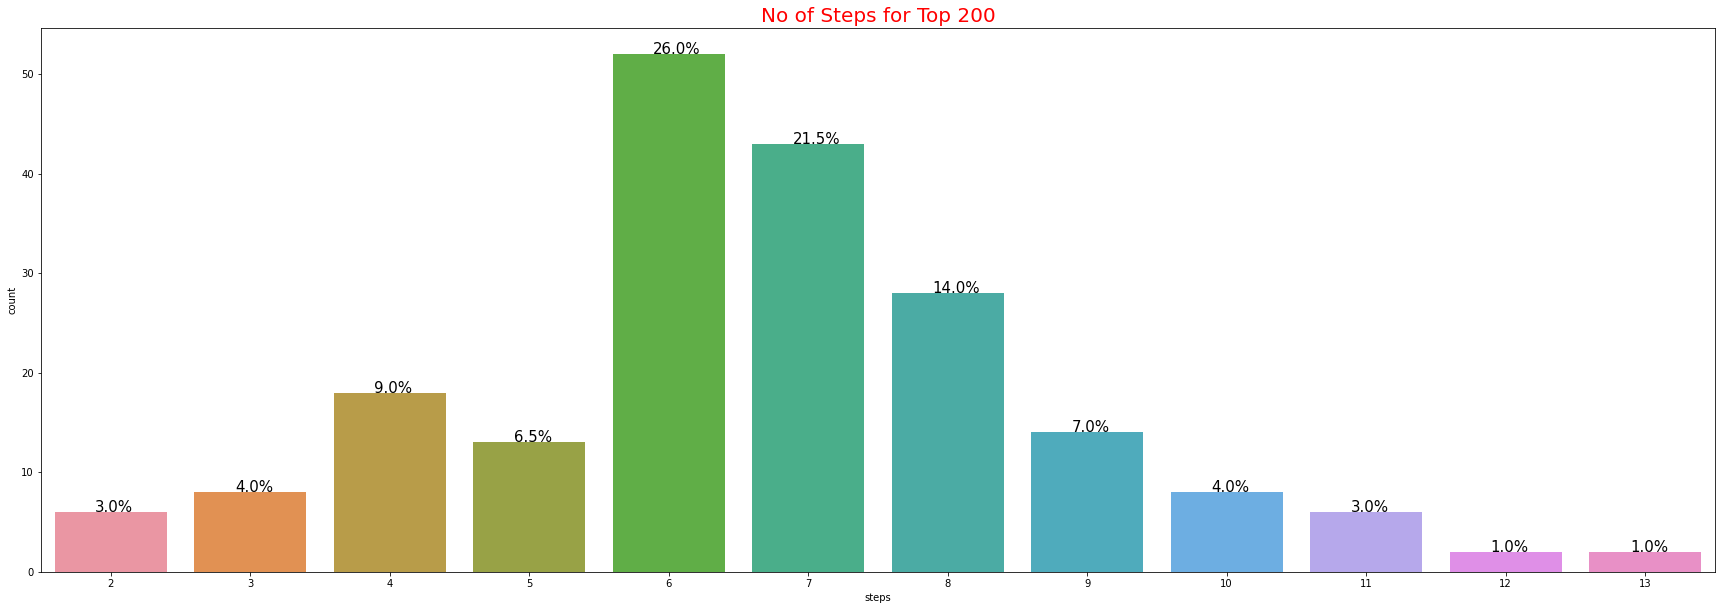

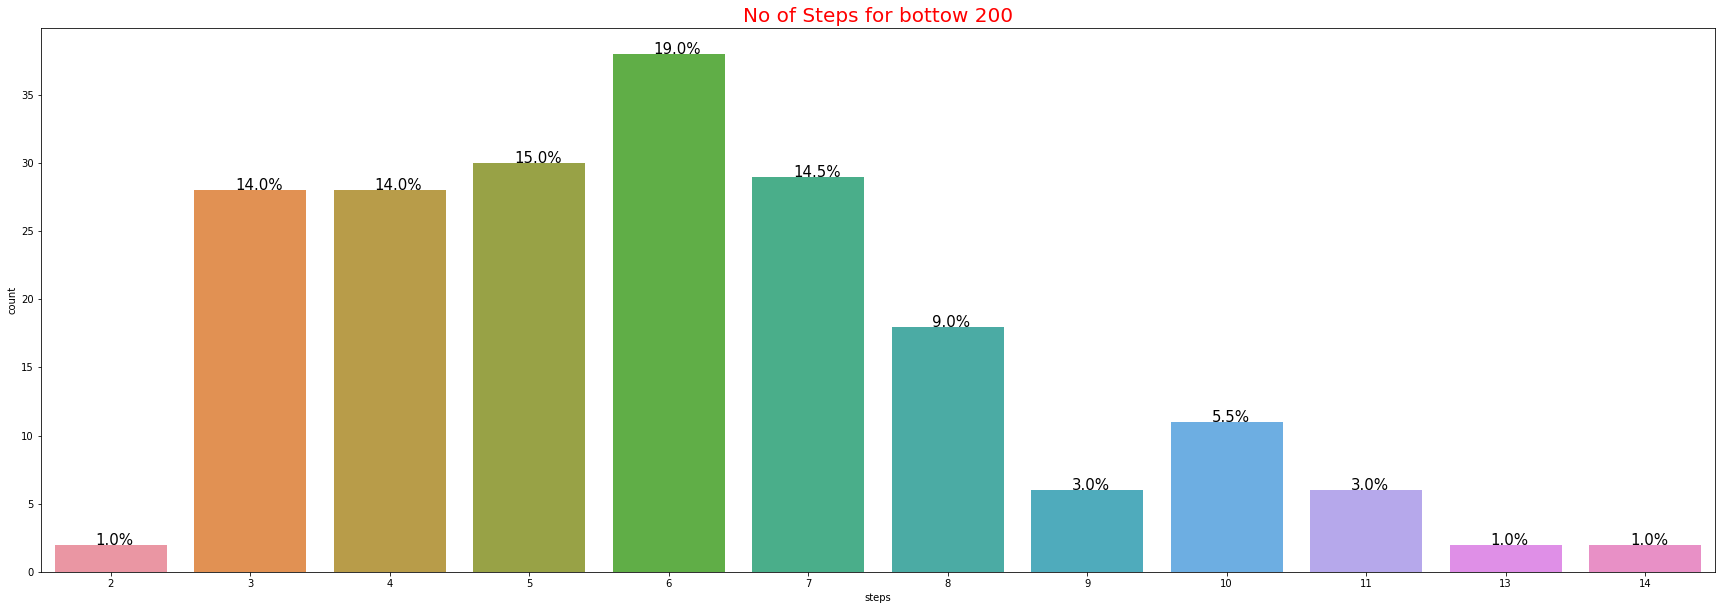

In [93]:
plt.figure(figsize=(30,10))
tp=sns.countplot(top_200['steps'])
plt.title('No of Steps for Top 200',fontdict={'fontsize':20, 'fontweight':10, 'color':'Red'})
ann_h(tp)

plt.show()

plt.figure(figsize=(30,10))
btm=sns.countplot(btm_200['steps'])
plt.title('No of Steps for bottow 200',fontdict={'fontsize':20, 'fontweight':10, 'color':'Red'})
ann_h(btm)

plt.show()



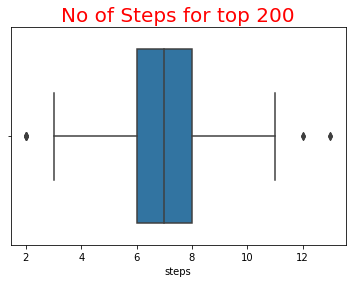

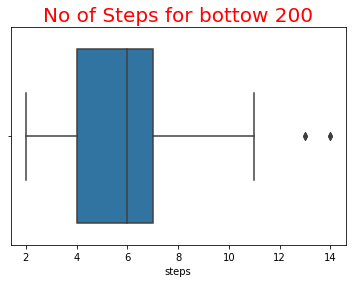

In [94]:
sns.boxplot(x = top_200['steps'], data =top_200)
plt.title('No of Steps for top 200',fontdict={'fontsize':20, 'fontweight':10, 'color':'Red'})
plt.show()

sns.boxplot(x = btm_200['steps'], data =btm_200)
plt.title('No of Steps for bottow 200',fontdict={'fontsize':20, 'fontweight':10, 'color':'Red'})
plt.show()



- 50% of successful recipes have 6 to 8 steps
- 50% of less successful recipes have steps 4 to 7 steps
- Overall there is not much difference 


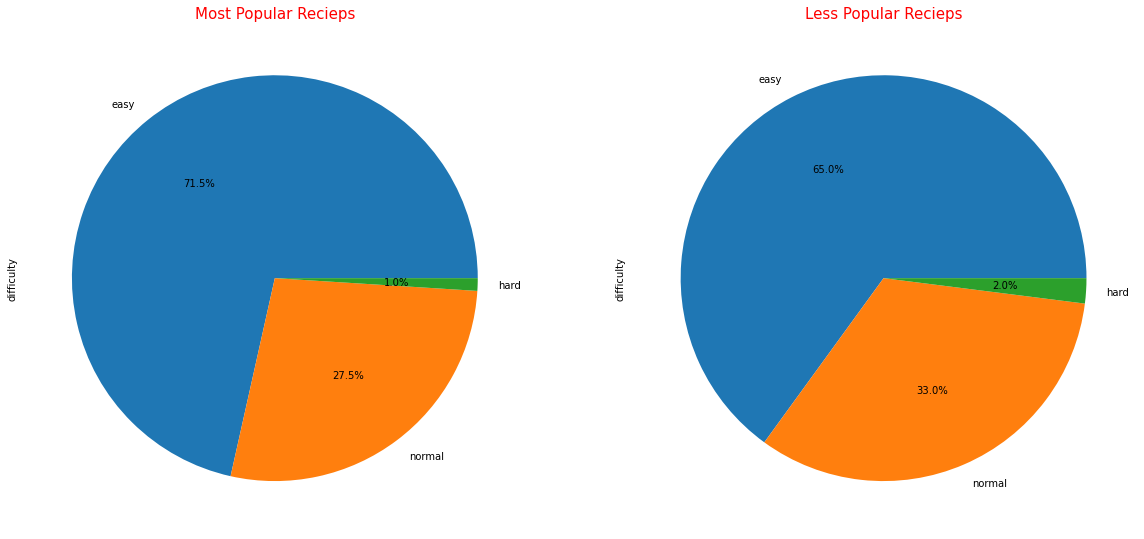

In [95]:
# Univarient categorical unordered- Understanding repayments across different Gender

plt.figure(figsize=(20,10))# sizing
plt.subplot(1,2,1)#subplot 1
top_200.difficulty.value_counts(normalize=True).plot.pie(autopct='%1.1f%%')
plt.title('Most Popular Recieps',fontdict={'fontsize':15, 'fontweight':10, 'color':'Red'})

plt.subplot(1,2,2)#subplot 2
btm_200.difficulty.value_counts(normalize=True).plot.pie(autopct='%1.1f%%')
plt.title('Less Popular Recieps',fontdict={'fontsize':15, 'fontweight':10, 'color':'Red'})
plt.show()

- There no significant difference in difficulty levels between popular and less popular

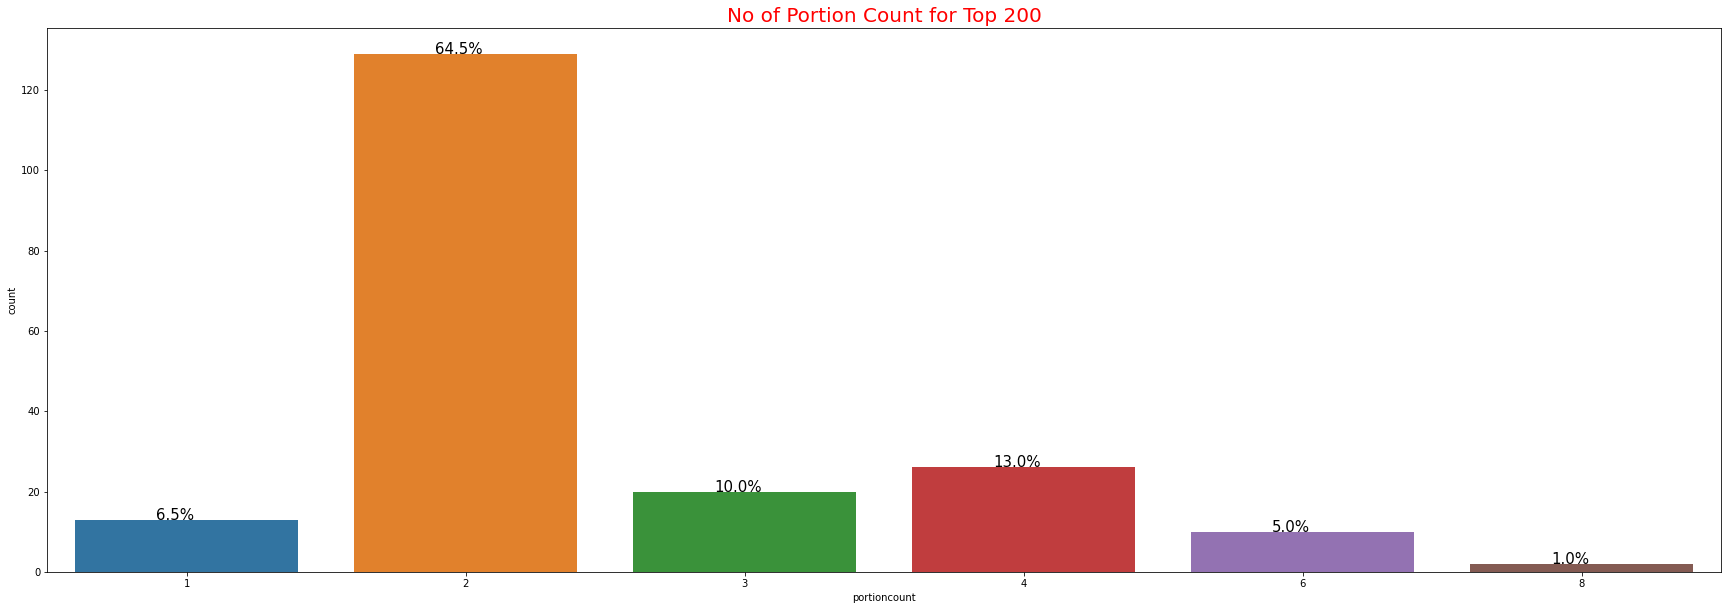

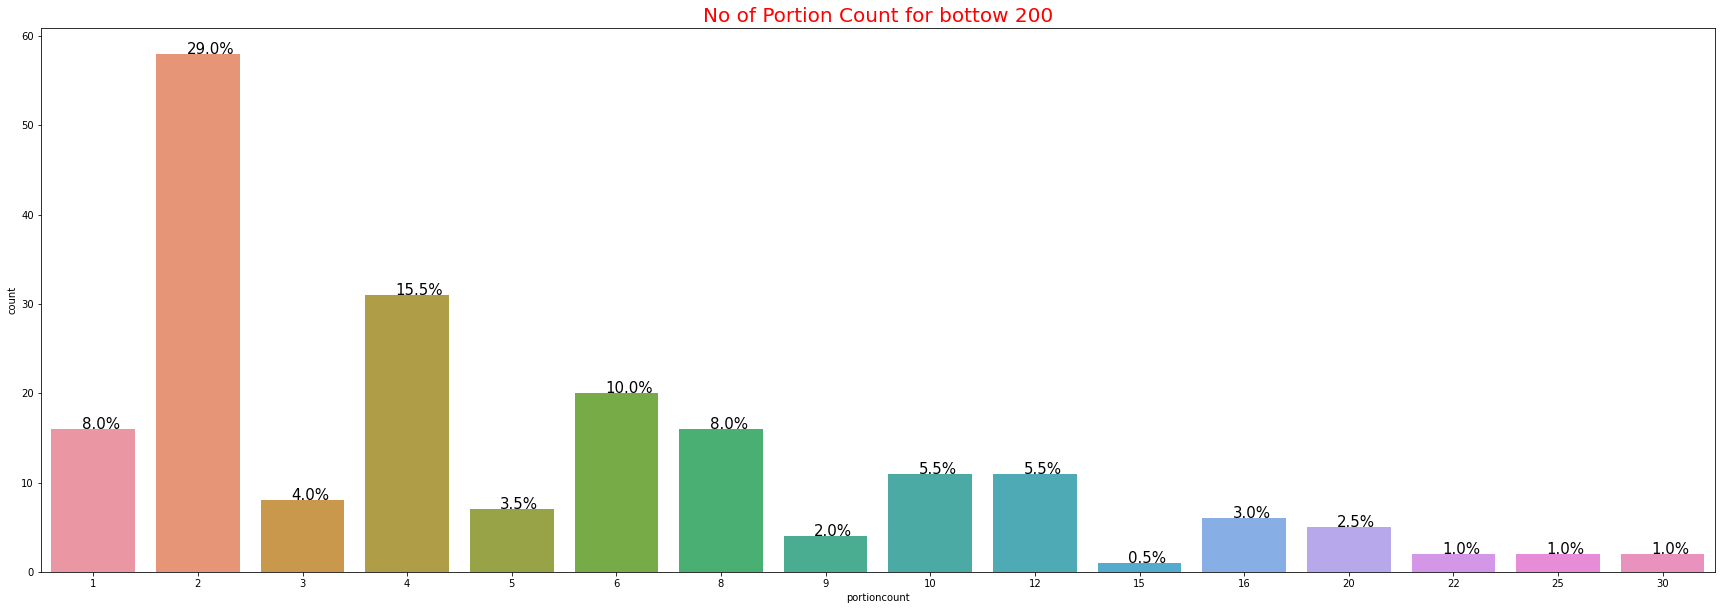

In [96]:
plt.figure(figsize=(30,10))
tp=sns.countplot(top_200['portioncount'])
plt.title('No of Portion Count for Top 200',fontdict={'fontsize':20, 'fontweight':10, 'color':'Red'})
ann_h(tp)

plt.show()

plt.figure(figsize=(30,10))
btm=sns.countplot(btm_200['portioncount'])
plt.title('No of Portion Count for bottow 200',fontdict={'fontsize':20, 'fontweight':10, 'color':'Red'})
ann_h(btm)

plt.show()

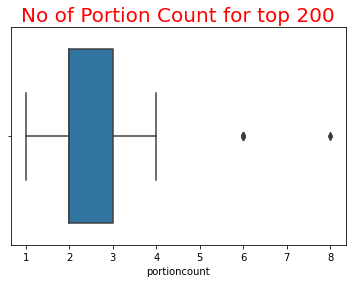

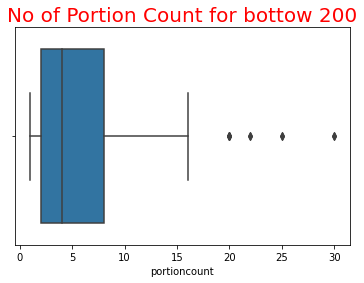

In [97]:
sns.boxplot(x = top_200['portioncount'], data =top_200)
plt.title('No of Portion Count for top 200',fontdict={'fontsize':20, 'fontweight':10, 'color':'Red'})
plt.show()

sns.boxplot(x = btm_200['portioncount'], data =btm_200)
plt.title('No of Portion Count for bottow 200',fontdict={'fontsize':20, 'fontweight':10, 'color':'Red'})
plt.show()

- We can see that the successful recipes have portion count from 1 to 8
- The less successful recipes have portion count from 1 to 30
- 64.5% percent of successful recipes have portion count of 2

------------------------------------

------------------------------------

In [98]:
rcps_list

recipe_id                                               name                                        description  portioncount  preparationtime difficulty  steps                                       instructions                                               tags                                           tag_list
0            100                             Green Spinach Smoothie  When you first hear it, a green smoothie might...             1                5       easy      3  ["Wash the spinach and spin dry. Then, place i...  low_calorie,low_fat,breakfast,snack,vegan,glut...  [low_calorie, low_fat, breakfast, snack, vegan...
842          101                   Catfish Goulash in Paprika Sauce  The meat of the catfish is firm and full of fl...             2               35     normal      8  ["Peel the onions and garlic clove and finely ...  high_protein,low_carb,lunch,dinner,gluten_free...  [high_protein, low_carb, lunch, dinner, gluten...
1131         102                           Chicken Paella with Peas  Paella is a traditional Spanish meal usually p...             2               60     normal     10  ["Mix 1 tsp. of olive oil and the paprika powd...  low_fat,lunch,dinner,lactose_free,gluten_free,...  [low_fat, lunch, dinner, lactose_free, gluten_...
1622         103             Lime Quinoa with BBQ Chicken & Avocado  This recipe isn't just an eye-catcher, it's a ...             4               30       hard      9  ["Cut the chicken into bite-sized pieces and s...             lunch,dinner,lactose_free,meat,400kcal       [lunch, dinner, lactose_free, meat, 400kcal]
2223         104                           Avocado Chocolate Mousse  A healthy alternative for chocolate lovers. Ou...             2                5       easy      3  ["Cut, pit and peel the avocado.","Mix with th...  low_carb,snack,vegan,vegetarian,gluten_free,la...  [low_carb, snack, vegan, vegetarian, gluten_fr...
2764         105               Marinated Beefsteak with Green Beans  The beefsteak and green beans are sautéed in t...             2               30     normal      9  ["Peel and finely chop the garlic clove and cu...  low_carb,high_protein,lunch,dinner,gluten_free...  [low_carb, high_protein, lunch, dinner, gluten...
3144         106           Cream Cheese & Spinach Rolls with Salmon  Our cream cheese and spinach rolls with salmon...             1               20     normal      6  ["Put 1 egg in the blender, separate the secon...  low_carb,dinner,lunch,gluten_free,sugar_free,f...  [low_carb, dinner, lunch, gluten_free, sugar_f...
3526         107                              Chicken & Potato Dish  There are a lot of frozen vegetable dishes, bu...             2               20     normal      6  ["Put the beans in a small pot of boiling wate...  low_calorie,low_fat,lunch,dinner,gluten_free,l...  [low_calorie, low_fat, lunch, dinner, gluten_f...
4423         108                         Potato Curry with Eggplant  Our potato curry with eggplant and light cocon...             1               40     normal      5  ["Cut the potatoes, eggplant, mushrooms and on...  low_calorie,lunch,dinner,gluten_free,lactose_f...  [low_calorie, lunch, dinner, gluten_free, lact...
4925         109                         Potato & Spinach Casserole  This casserole most certainly lives up to the ...             2               45     normal      7  ["Cut the potatoes into thin slices and lay in...  low_calorie,low_fat,lunch,dinner,casserole,veg...  [low_calorie, low_fat, lunch, dinner, casserol...
5620          10                   Sugar-free Bottomless Cheesecake  This cheesecake  can be prepared quickly and o...             8              180       hard      9  ["Coat a springform pan (Ø 18 cm \/ 7.1 inch) ...  low_carb,vegetarian,gluten_free,sugar_free,des...  [low_carb, vegetarian, gluten_free, sugar_free...
6135         110                                      One-Pot Pasta  Not in the mood to dirty a bunch of dishes? Th...             1               15      

##### <font color='pink'> Popular Recipe Tags </font>

In [99]:
to_1D(top_200["tag_list"]).value_counts() #most used tags among the popular recipes 

dinner             183
lunch              183
easy               143
vegetables         131
lactose_free       120
vegetarian         111
sugar_free         110
gluten_free        106
clean_eating        70
vegan               68
meat                63
low_fat             61
300kcal             56
low_carb            54
low_calorie         52
400kcal             48
200kcal             45
500kcal             36
on_the_go           34
detox               34
few_ingredients     28
breakfast           27
high_protein        26
high_fiber          20
soup                20
casserole           18
fish                14
salad               14
pescatarian         14
christmas           12
fast                12
600kcal             11
fruits              11
sweet               10
basic                8
dessert              6
ketogenic            4
700kcal              2
baking               2
100kcal              2
dtype: int64

In [100]:
to_1D(top_200["tag_list"]).value_counts()[:10] #the top 10 tags for popular recipes

dinner          183
lunch           183
easy            143
vegetables      131
lactose_free    120
vegetarian      111
sugar_free      110
gluten_free     106
clean_eating     70
vegan            68
dtype: int64

In [101]:
to_1D(top_200["tag_list"]).value_counts()[-10:] #the top 10 tags for popular recipes

fast         12
600kcal      11
fruits       11
sweet        10
basic         8
dessert       6
ketogenic     4
700kcal       2
baking        2
100kcal       2
dtype: int64

Text(0.5, 1.0, 'Most populat tags with Popular recipe')

<Figure size 2160x1440 with 0 Axes>

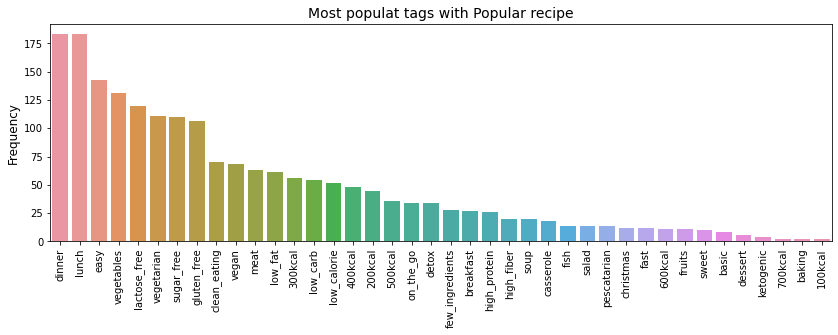

In [102]:
plt.figure(figsize=(30,20))
fig, ax = plt.subplots(figsize = (14,4))
ax=sns.barplot(to_1D(top_200["tag_list"]).value_counts().index,
        to_1D(top_200["tag_list"]).value_counts().values)



plt.xticks(rotation=90)
ax.set_ylabel("Frequency", size = 12)
ax.set_title("Most populat tags with Popular recipe", size = 14)

The top 10 tags for Popular recipes are 
- lunch
- dinner
- easy
- vegetables
- lactose_free
- vegetarian
- sugar_free
- gluten_free
- clean_eating
- vegan


The bottom 10 tags for popular recipes are fast
- 600kcal
- fruits
- sweet
- basic
- dessert
- ketogenic
- 100kcal
- baking
- 700kcal



In [103]:
to_1D(btm_200["tag_list"]).value_counts() #tag counts for least popular tags

vegetarian         170
lactose_free       166
gluten_free        160
easy               130
vegan              116
on_the_go          108
snack               99
sweet               99
sugar_free          90
dessert             81
fruits              72
low_carb            60
clean_eating        58
high_fiber          56
lunch               56
dinner              56
vegetables          54
100kcal             48
low_fat             45
breakfast           45
few_ingredients     44
fast                39
christmas           36
low_calorie         36
baking              35
200kcal             30
500kcal             28
300kcal             25
600kcal             22
50kcal              20
meat                19
detox               18
400kcal             15
smoothie             8
ketogenic            8
salad                6
high_protein         6
pescatarian          4
700kcal              4
fish                 4
shake                2
basic                2
casserole            2
soup       

In [104]:
to_1D(btm_200["tag_list"]).value_counts()[:10] #top 10 tags for least popular tags

vegetarian      170
lactose_free    166
gluten_free     160
easy            130
vegan           116
on_the_go       108
snack            99
sweet            99
sugar_free       90
dessert          81
dtype: int64

In [105]:
to_1D(btm_200["tag_list"]).value_counts()[-10:] #bottom 10 tags for least popular tags

ketogenic       8
salad           6
high_protein    6
pescatarian     4
700kcal         4
fish            4
shake           2
basic           2
casserole       2
soup            2
dtype: int64

Text(0.5, 1.0, 'Tags of less Popular recipe')

<Figure size 2160x1440 with 0 Axes>

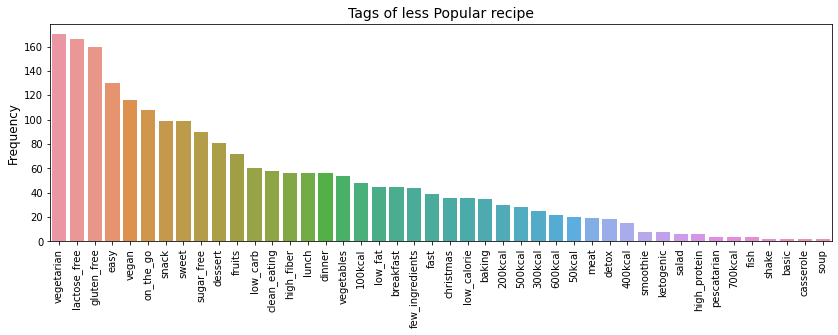

In [106]:
plt.figure(figsize=(30,20))
fig, ax = plt.subplots(figsize = (14,4))
ax=sns.barplot(to_1D(btm_200["tag_list"]).value_counts().index,
        to_1D(btm_200["tag_list"]).value_counts().values)



plt.xticks(rotation=90)
ax.set_ylabel("Frequency", size = 12)
ax.set_title("Tags of less Popular recipe", size = 14)

In [107]:
top_200

recipe_id                                             name_x                                        description  portioncount  preparationtime difficulty  steps                                       instructions                                               tags                                           tag_list  index                                             name_y  type  no_users  s_rate
0        1543                          Potato Broccoli Casserole  Our Potato Broccoli Casserole is a dish to eat...             6               40       easy      8  ["Preheat the oven to 395°F (200°C).","Cut the...  dinner,lunch,vegetables,casserole,vegetarian,3...  [dinner, lunch, vegetables, casserole, vegetar...    277                          Potato Broccoli Casserole  view      6523   14.27
1        1543                          Potato Broccoli Casserole  Our Potato Broccoli Casserole is a dish to eat...             6               40       easy      8  ["Preheat the oven to 395°F (200°C).","Cut the...  dinner,lunch,vegetables,casserole,vegetarian,3...  [dinner, lunch, vegetables, casserole, vegetar...   1314                          Potato Broccoli Casserole   use       931   14.27
2        1416                                  Gnocchi Casserole  You can whip up this Gnocchi Casserole in no t...             4               34       easy      9  ["Preheat the oven to 360°F (180°C).","Heat 1⁄...  dinner,lunch,casserole,vegetarian,sugar_free,v...  [dinner, lunch, casserole, vegetarian, sugar_f...   1057                                  Gnocchi Casserole   use      1414   12.80
3        1416                                  Gnocchi Casserole  You can whip up this Gnocchi Casserole in no t...             4               34       easy      9  ["Preheat the oven to 360°F (180°C).","Heat 1⁄...  dinner,lunch,casserole,vegetarian,sugar_free,v...  [dinner, lunch, casserole, vegetarian, sugar_f...    169                                  Gnocchi Casserole  view     11043   12.80
4        1042                               Carrot & Orange Soup  With freshly-squeezed orange juice, our Carrot...             2               40       easy      7  ["Start by chopping the carrots into pieces. P...  low_calorie,dinner,lunch,vegan,vegetarian,lact...  [low_calorie, dinner, lunch, vegan, vegetarian...   1923                               Carrot & Orange Soup   use       221   12.49
5        1042                               Carrot & Orange Soup  With freshly-squeezed orange juice, our Carrot...             2               40       easy      7  ["Start by chopping the carrots into pieces. P...  low_calorie,dinner,lunch,vegan,vegetarian,lact...  [low_calorie, dinner, lunch, vegan, vegetarian...    919                               Carrot & Orange Soup  view      1769   12.49
6        1109                            Carrot & Peanut Risotto  Our Carrot & Peanut Risotto is super creamy an...             2               35       easy      6  ["Peel and finely chop the onion, and grate th...  dinner,lunch,vegan,vegetarian,lactose_free,veg...  [dinner, lunch, vegan, vegetarian, lactose_fre...   2130                            Carrot & Peanut Risotto   use       128   11.78
7        1109                            Carrot & Peanut Risotto  Our Carrot & Peanut Risotto is super creamy an...             2               35       easy      6  ["Peel and finely chop the onion, and grate th...  dinner,lunch,vegan,vegetarian,lactose_free,veg...  [dinner, lunch, vegan, vegetarian, lactose_fre...   1234                            Carrot & Peanut Risotto  view      1087   11.78
8         798                              Beef Noodle Casserole  For a lot of people, noodle casseroles bring b...             6               45       easy     10  ["Preheat the oven to 180°C \/ 360°F.","Follow...  dinner,lunch,sugar_free,casserole,meat,vegetab...  [dinner, lunch, sugar_free, casserole, meat, v...     29                              Beef Noodle Casserole  view     36845   11.75
9   

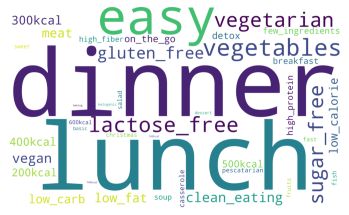

In [108]:
text_tag = " ".join(cat for cat in top_200['tags'])

from wordcloud import WordCloud, STOPWORDS
    
    # Generate word cloud
word_cloud = WordCloud(
        width=5000,
        height=3000,
        random_state=1,
        background_color="white",
        collocations=False,
        stopwords=STOPWORDS,
        ).generate(text_tag)
        # Display the generated Word Cloud
plt.imshow(word_cloud)
plt.axis("off")
plt.show()

- Most of the tags with more successful recipes  are lunch, dinner, easy, vegetables
- Tags like dessert, Christmas, basic doesn't seem to be popular


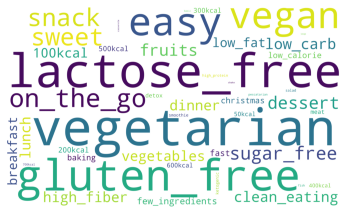

In [109]:
text_tag = " ".join(cat for cat in btm_200['tags'])

from wordcloud import WordCloud, STOPWORDS
    
    # Generate word cloud
word_cloud = WordCloud(
        width=5000,
        height=3000,
        random_state=1,
        background_color="white",
        collocations=False,
        stopwords=STOPWORDS,
        ).generate(text_tag)
        # Display the generated Word Cloud
plt.imshow(word_cloud)
plt.axis("off")
plt.show()

- Most of the tags with less popular recipes  are diet specific like vegan, lactose_free, gluten_free

Overall we could say that, 
recipes with smaller portion tend to be successful. Portion size of 2 would be best choice. 
recipes with more generic tags rather then specific to a particular diet seem to be more popular.

Based on the data it would be ideal to create recipes with smaller portion, easy preparation and more generic tag
